# **ANALYSE FACTORS IMPACTING AMES HOUSING PRICE:**

### **Objective**
The primary objective of the project is to asses the data of Ames housing and derive insights regarding the factrs that impact the property price.

# **Data loading:**

In [ ]:
#import the libraries essential for the analysis and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

There are 2 data sets being provided. For this analysis, both the data sets are concatenated and the analysis is performed.

In [ ]:
#Reading the North dataset
df_north=pd.read_csv('/content/Ames_Housing_North (1).csv')
df_north.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
1,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
2,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
3,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
4,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


From reading the file, we observed PID column is Unique Identifier and the target variable is Sale price column. so concatenation is performed based on the PID column for the north and the south datasets.

In [ ]:
df_north.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2107 entries, 0 to 2106
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2107 non-null   int64  
 1   MS SubClass      2107 non-null   int64  
 2   MS Zoning        2107 non-null   object 
 3   Lot Frontage     1705 non-null   float64
 4   Lot Area         2107 non-null   int64  
 5   Street           2107 non-null   object 
 6   Alley            73 non-null     object 
 7   Lot Shape        2107 non-null   object 
 8   Land Contour     2107 non-null   object 
 9   Utilities        2107 non-null   object 
 10  Lot Config       2107 non-null   object 
 11  Land Slope       2107 non-null   object 
 12  Neighborhood     2107 non-null   object 
 13  Condition 1      2107 non-null   object 
 14  Condition 2      2107 non-null   object 
 15  Bldg Type        2107 non-null   object 
 16  House Style      2107 non-null   object 
 17  Overall Qual  

In [ ]:
df_south=pd.read_csv('/content/Ames_Housing_South (1).csv')
df_south.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,535377090,90,RL,64.0,6979,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000
1,902102100,50,RM,60.0,4800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,COD,Abnorml,80400
2,902104060,50,RM,55.0,8800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,96500
3,902106130,30,RM,56.0,4485,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,109500
4,902106140,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000


In [ ]:

df_south.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              380 non-null    int64  
 1   MS SubClass      380 non-null    int64  
 2   MS Zoning        380 non-null    object 
 3   Lot Frontage     360 non-null    float64
 4   Lot Area         380 non-null    int64  
 5   Street           380 non-null    object 
 6   Alley            122 non-null    object 
 7   Lot Shape        380 non-null    object 
 8   Land Contour     380 non-null    object 
 9   Utilities        380 non-null    object 
 10  Lot Config       380 non-null    object 
 11  Land Slope       380 non-null    object 
 12  Neighborhood     380 non-null    object 
 13  Condition 1      380 non-null    object 
 14  Condition 2      380 non-null    object 
 15  Bldg Type        380 non-null    object 
 16  House Style      380 non-null    object 
 17  Overall Qual    

In [ ]:
#concatenate the 2 data sets to get the overall factors impacting the sale price in AMES
df_combined=pd.concat([df_north, df_south], ignore_index=True) # default set axis to 0 so stacks one below the other

In [ ]:
df_combined.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
1,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
2,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
3,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
4,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


In [ ]:
def generate_column_summary(df):
  summary=[]
  for col in df.columns:
    col_data=df[col]
    missing_percent=col_data.isnull().mean()*100
    unique_val=col_data.nunique(dropna=True)
    col_type=col_data.dtype
    example_values=col_data.dropna().unique()[:5]
    summary.append({
        'Column':col,
        'missing_values':missing_percent,
        'unique_values':unique_val,
        'column_dtype':col_type,
        'Example_values':example_values
    })
  return pd.DataFrame(summary)
summary_df=generate_column_summary(df_combined)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
summary_df

,Column,missing_values,unique_values,column_dtype,Example_values
0,PID,0.000000,2487,int64,"[527105010, 527105030, 527127150, 527145080, 5..."
1,MS SubClass,0.000000,16,int64,"[60, 120, 20, 50, 85]"
2,MS Zoning,0.000000,7,object,"[RL, FV, RM, RH, A (agr)]"
3,Lot Frontage,16.968235,124,float64,"[74.0, 78.0, 41.0, 43.0, 39.0]"
4,Lot Area,0.000000,1723,int64,"[13830, 9978, 4920, 5005, 5389]"
5,Street,0.000000,2,object,"[Pave, Grvl]"
6,Alley,92.159228,2,object,"[Pave, Grvl]"
7,Lot Shape,0.000000,4,object,"[IR1, Reg, IR2, IR3]"
8,Land Contour,0.000000,4,object,"[Lvl, HLS, Bnk, Low]"
9,Utilities,0.000000,3,object,"[AllPub, NoSeWa, NoSewr]"


In [ ]:
from IPython.display import display
display(summary_df)

,Column,missing_values,unique_values,column_dtype,Example_values
0,PID,0.000000,2487,int64,"[527105010, 527105030, 527127150, 527145080, 5..."
1,MS SubClass,0.000000,16,int64,"[60, 120, 20, 50, 85]"
2,MS Zoning,0.000000,7,object,"[RL, FV, RM, RH, A (agr)]"
3,Lot Frontage,16.968235,124,float64,"[74.0, 78.0, 41.0, 43.0, 39.0]"
4,Lot Area,0.000000,1723,int64,"[13830, 9978, 4920, 5005, 5389]"
5,Street,0.000000,2,object,"[Pave, Grvl]"
6,Alley,92.159228,2,object,"[Pave, Grvl]"
7,Lot Shape,0.000000,4,object,"[IR1, Reg, IR2, IR3]"
8,Land Contour,0.000000,4,object,"[Lvl, HLS, Bnk, Low]"
9,Utilities,0.000000,3,object,"[AllPub, NoSeWa, NoSewr]"


# **Data Cleaning and Data Preparation**

In [ ]:
df_combined.index

RangeIndex(start=0, stop=2487, step=1)

**Handle Missing values**

In [ ]:
#taking count of the missing values:
df_combined.isnull().mean().mul(100).sort_values(ascending=False)

,0
Pool QC,99.557700
Misc Feature,96.863691
Alley,92.159228
Fence,82.790511
Mas Vnr Type,61.037394
Fireplace Qu,46.521914
Lot Frontage,16.968235
Garage Yr Blt,5.991154
Garage Cond,5.991154
Garage Qual,5.991154


from the above the list of missing values containing columns with mean percentage of null values are as follows:

Pool QC	:99.557700

Misc Feature:96.863691

Alley	92.159228

Fence	: 82.790511

Mas Vnr Type: 61.037394

Fireplace Qu: 46.521914

Lot Frontage: 16.968235

Garage Yr Blt: 	5.991154

Garage Cond:	5.991154

Garage Qual:	5.991154

Garage Finish;	5.991154

Garage Type;	5.910736

Bsmt Exposure;	2.653800

BsmtFin Type; 2	2.573382

Bsmt Cond;	2.533172

Bsmt Qual;	2.533172

BsmtFin Type 1:	2.533172

Mas Vnr Area:	0.924809

Bsmt Full Bath:	0.080418

Bsmt Half Bath:	0.080418

Total Bsmt SF:	0.040209

Garage Area:	0.040209

Garage Cars:	0.040209

BsmtFin SF 1:	0.040209

Electrical:	0.040209

Bsmt Unf SF:	0.040209

In [ ]:
df_combined.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [ ]:
#Fill missing values for the columns shown above

In [ ]:
#missing value in Pool QC
df_combined['Pool QC'].value_counts()

,count
Pool QC,
Gd,4
Ex,3
TA,2
Fa,2


The missing values in the Pool QC column could indicate a property without a Pool as shown with the reference label vs the count of values present.

       Ex        Excellent
       Gd        Good
       TA        Average/Typical
       Fa        Fair
       ND        No Pool


However there is also a chance if there is a pool present but the Qulity check was not performed. Hence to confirm that we check if the subsequent values for which the pool QC missing also have a missing value or 0 in the pool area column. Thereby, it confirms the absence of the pool in the property.

In [ ]:
#lets confirm if the properties with missing pool QC also has missing pool area.

In [ ]:
df_combined['Pool Area'].value_counts()

,count
Pool Area,
0,2476
144,1
480,1
576,1
555,1
444,1
228,1
561,1
519,1


In [ ]:
# Check if Pool Area is 0 where Pool QC is missing
missing_pool_qc = df_combined["Pool QC"].isnull()
pool_area_zero = df_combined["Pool Area"] == 0
pool_QC_pool_area = (missing_pool_qc == pool_area_zero).mean()
print(f"correlation between pool area missing where pool qc is null is {pool_QC_pool_area }")

correlation between pool area missing where pool qc is null is 1.0


Due to such a strong correlation, to wherever pool area is missing with the pool QC null values, it indicates that the null values represent 'ND' (no Pool). So missing values in the Pool QC column are imputed with ND

In [ ]:
#Fill Pool QC missing values with ND
df_combined['Pool QC']=df_combined['Pool QC'].fillna("ND")

In [ ]:
#Handling missing values in the Misc Features column
df_combined['Misc Feature'].value_counts()

,count
Misc Feature,
Shed,71
Gar2,3
Othr,2
Elev,1
TenC,1


Similar to the above pool example lets check if for every null value of the misc features, lets check if there is any misc value(cost of preparing the misc features ) is present.

In [ ]:
df_combined['Misc Val'].value_counts()

,count
Misc Val,
0,2409
400,16
500,11
600,7
450,6
700,5
2000,5
650,2
2500,2


In [ ]:
missed_misc=df_combined['Misc Feature'].isnull()
misc_value0=df_combined['Misc Val']==0
corr_misc=(missed_misc==0).mean()
print(f"correlation between misc value equal to 0 and misc features missing values is: {corr_misc}")

correlation between misc value equal to 0 and misc features missing values is: 0.031363088057901084


The correlation is low, indicating an amount spent has been metioned in the misc value column for an misc feature but probably the feature was not noted.

In [ ]:
summary = pd.DataFrame({
    "Total Dollars": df_combined.groupby("Misc Feature")["Misc Val"].sum(),
    "Average Dollars": df_combined.groupby("Misc Feature")["Misc Val"].mean(),
    "Count": df_combined.groupby("Misc Feature").size()
})
print("\nSummary of dollars spent on each Misc Feature:")
print(summary)


Summary of dollars spent on each Misc Feature:
              Total Dollars  Average Dollars  Count
Misc Feature                                       
Elev                  17000     17000.000000      1
Gar2                  15800      5266.666667      3
Othr                   6500      3250.000000      2
Shed                  54266       764.309859     71
TenC                   2000      2000.000000      1


Due to the disparity between the Misc value and Misc Feature column, the features for which amount spent are mentioned need to be filled with the corresponding feature in the column.

In [ ]:
#impute all the missing values in the misc features column with none
df_combined['Misc Feature']=df_combined['Misc Feature'].fillna("None")

Upon filling the missing misc features with none, we are trying to first know which rows have a value in missing value entered greater than 0 where the corresponding misc feature is none to highlight the rows where there is inconsistencies.

In [ ]:
#now next step is to fill the misc features for which there is some values spent is being mentioned.
# Calculate the average Misc Val for each Misc Feature (excluding "None")
mean_misc_val = df_combined[df_combined["Misc Feature"] != "None"].groupby("Misc Feature")["Misc Val"].mean()
print("Average Misc Val for each Misc Feature:")
print(mean_misc_val)

# Function to impute Misc Feature based on Misc Val
def impute_misc_feature(row):
    if row["Misc Feature"] == "None" and row["Misc Val"] > 0:
        # Find the Misc Feature with the closest average Misc Val
        closest_feature = mean_misc_val.index[
            (mean_misc_val - row["Misc Val"]).abs().argmin()
        ]
        return closest_feature
    return row["Misc Feature"]

# Apply the imputation
df_combined["Misc Feature"] = df_combined.apply(impute_misc_feature, axis=1)

Average Misc Val for each Misc Feature:
Misc Feature
Elev    17000.000000
Gar2     5266.666667
Othr     3250.000000
Shed      764.309859
TenC     2000.000000
Name: Misc Val, dtype: float64


In [ ]:
df_combined['Misc Feature'].value_counts()

,count
Misc Feature,
None,2409
Shed,71
Gar2,3
Othr,2
Elev,1
TenC,1


In [ ]:
df_combined['Misc Val'].value_counts()

,count
Misc Val,
0,2409
400,16
500,11
600,7
450,6
700,5
2000,5
650,2
2500,2


If you notice, there is 2409 rows with none value which is the same as total count of misc value==0. Thus the rows with none in misc features implies that the feature is missing in the property.

In [ ]:
df_combined['Alley'].value_counts()

,count
Alley,
Grvl,118
Pave,77


       Grvl        Gravel
       Pave        Paved
       ND         No alley access
As seen from the description, when there is no alley, it must be filled with ND. So the empty columns could mean no alley access.

In [ ]:
df_combined['Alley']=df_combined['Alley'].fillna("ND")

In [ ]:
#handling missing values in the Fence column
df_combined['Fence'].value_counts()

,count
Fence,
MnPrv,270
GdPrv,97
GdWo,58
MnWw,3


       GdPrv        Good Privacy
       MnPrv        Minimum Privacy
       GdWo        Good Wood
       MnWw        Minimum Wood/Wire
       ND        No Fence

Again here the missing values in fence could be No Fence present in the property. so the missing values would be imputed with ND

In [ ]:
df_combined['Fence']=df_combined['Fence'].fillna('ND')

In [ ]:
df_combined['Mas Vnr Type'].value_counts()

,count
Mas Vnr Type,
BrkFace,726
Stone,228
BrkCmn,14
CBlock,1


Mas Vnr Type (Nominal): Masonry veneer type


       BrkCmn        Brick Common
       BrkFace        Brick Face
       CBlock        Cinder Block
       None        None
       Stone        Stone

 As can be  seen for Mas Vnr, the missing values is probably "None" indicating none of the material was exclusively used for the housing construction

In [ ]:
df_combined['Mas Vnr Type']=df_combined['Mas Vnr Type'].fillna('None')

In [ ]:
df_combined['Fireplace Qu'].value_counts()

,count
Fireplace Qu,
Gd,659
TA,539
Fa,57
Ex,42
Po,33


In [ ]:
df_combined['Fireplace Qu'].isnull().sum()

np.int64(1157)

In [ ]:
df_combined['Fireplaces'].value_counts()

,count
Fireplaces,
0,1157
1,1141
2,180
3,8
4,1


as seen from above since the number of fire places excluding 0 is equal to number of firplace quality that is present, the missing values in the fire place quality is most likely to contribute to the fireplace not present.
So imputing missing value of fireplace quality with a new category ND=No fire place

In [ ]:
df_combined['Fireplace Qu']=df_combined['Fireplace Qu'].fillna("ND")


Handling missing values in a numeric continuous variable as Lot Frontage.

In [ ]:
df_combined['Lot Frontage'].value_counts()

,count
Lot Frontage,
60.0,222
50.0,115
75.0,84
80.0,82
65.0,81
70.0,80
85.0,59
21.0,50
24.0,49


It is important to know the skewness distribuition of the data to fill the missing values with mean(uniform data distribuition) or median(highly skewed distribuition) respectively. Thus the data description is obtained based on quantiles as below:

In [ ]:
df_combined['Lot Frontage'].describe()

,Lot Frontage
count,2065.000000
mean,68.137530
std,23.816207
min,21.000000
25%,55.000000
50%,65.000000
75%,80.000000
max,313.000000


In [ ]:
df_combined['Lot Frontage'].quantile([0.1,0.2,0.5,0.65,0.75,0.99,1.0])

,Lot Frontage
0.10,41.00
0.20,50.00
0.50,65.00
0.65,75.00
0.75,80.00
0.99,135.36
1.00,313.00


In [ ]:
df_combined['Lot Frontage'].skew()

np.float64(1.1688299493210121)

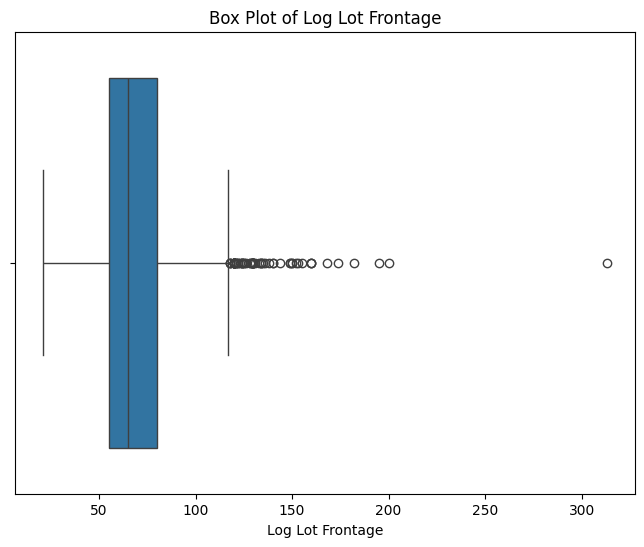

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_combined["Lot Frontage"].dropna())
plt.title("Box Plot of Log Lot Frontage")
plt.xlabel("Log Lot Frontage")
plt.show()

From the above since we can see that the data is skewed, the missing data would be imputed with the median to avoid bias.

In [ ]:
median_lot_frontage=df_combined['Lot Frontage'].median()
df_combined['Lot Frontage']=df_combined['Lot Frontage'].fillna(median_lot_frontage)


In [ ]:
df_combined['Garage Yr Blt'].value_counts()

,count
Garage Yr Blt,
2005.0,140
2006.0,115
2007.0,114
2004.0,99
2003.0,90
1977.0,63
2008.0,60
1998.0,56
2000.0,54


In [ ]:
df_combined['Garage Yr Blt'].isnull().sum()

np.int64(149)

Since the overall objective is to analyse the impact of different attributes towards price prediction, the missing values of the garage building year is left without imputationa s it does not seem to impact the analysis. Because, based on the given information of the garage, we can come up with a prediction as to if the newer built garages are sold at a higher price or if it is false. By assuming the year built and filling the column with a mode or median or mean, can give false information as to the garage being present in the property.

In [ ]:
df_combined['Garage Cond'].value_counts()

,count
Garage Cond,
TA,2240
Fa,70
Po,14
Gd,12
Ex,2


In [ ]:
df_combined['Garage Cond'].isnull().sum()

np.int64(149)

In [ ]:
df_combined['Garage Finish'].isnull().sum()

np.int64(149)

In [ ]:
df_combined['Garage Finish'].value_counts()

,count
Garage Finish,
Unf,996
Fin,677
RFn,665


Garage Cond (Ordinal): Garage condition


       Ex        Excellent
       Gd        Good
       TA        Typical/Average
       Fa        Fair
       Po        Poor
       ND        No Garage
From the above, the missing values sum since it is equal to the missing values

In [ ]:
df_combined['Garage Type'].value_counts()

,count
Garage Type,
Attchd,1433
Detchd,670
BuiltIn,179
Basment,28
2Types,20
CarPort,10


In [ ]:
df_combined['Garage Type'].isnull().sum()

np.int64(147)

In [ ]:
df_combined['Garage Area'].isnull().sum()

np.int64(1)

In [ ]:
df_combined['Garage Area'].value_counts()

,count
Garage Area,
0.0,147
440.0,85
576.0,72
484.0,67
528.0,58
240.0,53
400.0,50
480.0,39
264.0,39


In [ ]:
df_combined['Garage Cars'].value_counts()

,count
Garage Cars,
2.0,1391
1.0,568
3.0,365
0.0,147
4.0,14
5.0,1


In [ ]:
df_combined['Garage Type'].value_counts()

,count
Garage Type,
Attchd,1433
Detchd,670
BuiltIn,179
Basment,28
2Types,20
CarPort,10


In [ ]:
df_combined['Garage Type'].isnull().sum()

np.int64(147)

In [ ]:
df_combined['Garage Qual'].value_counts()

,count
Garage Qual,
TA,2189
Fa,120
Gd,22
Po,5
Ex,2


In [ ]:
df_combined['Garage Qual'].isnull().sum()

np.int64(149)

From the columns list, these are the column related to garage details. before filling the missing values, when checked for the missing values following was the count of missing values/zeros indicating the absence of garage.

Garage Type (Nominal): Garage location, -147 null values

Garage Yr Blt (Discrete): Year garage was built- 149 null values

Garage Finish (Ordinal) : Interior finish of the garage- 149 null values

 Garage Cars (Discrete): Size of garage in car capacity- 147 values had 0 cars

 Garage Area (Continuous): Size of garage in square feet-147 values is 0, 1 null value

 Garage Qual (Ordinal): Garage quality- 149 null values

 Garage Cond (Ordinal): Garage condition- 149 null values.

see for the garage missing values, for garage fiinish and garage type alone there are 149 missing values and for all other attributes therer are only 147 missing values.

1. find out the values that is missing in garage finish and garage type but are present in the other garage columns. then drop them. fill the remaining garage coumns with ND indicating no garage.

In [ ]:
# Define garage-related columns
garage_cols = ['Garage Type', 'Garage Yr Blt', 'Garage Finish',
               'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']

# Define garage_missing and garage_present conditions
#garage missing data frame checks if there are any rows with any data missing or is equal to zero
garage_missing = (
    df_combined['Garage Type'].isnull() |
    df_combined['Garage Yr Blt'].isnull() |
    df_combined['Garage Finish'].isnull() |
    (df_combined['Garage Cars'] == 0) |
    (df_combined['Garage Area'] == 0) |
    df_combined['Garage Qual'].isnull() |
    df_combined['Garage Cond'].isnull()
)

#garage present combines the rows from the df_combined data frame where atleast any of the garage details are not null.
garage_present = (
    df_combined['Garage Type'].notnull() |
    df_combined['Garage Yr Blt'].notnull() |
    df_combined['Garage Finish'].notnull() |
    (df_combined['Garage Cars'] > 0) |
    (df_combined['Garage Area'] > 0) |
    df_combined['Garage Qual'].notnull() |
    df_combined['Garage Cond'].notnull()
)

# Find inconsistent rows where garage details are partially filled-contqains garage details in nthe row where there are some values missing and some values are present for the same row.
inconsistent_rows = df_combined[garage_missing & garage_present]

# Show the inconsistent rows
inconsistent_rows

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2285,903426160,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,ND,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64,0,180,0,0,0,ND,MnPrv,Shed,1000,9,2008,WD,Normal,160000
2395,910201180,70,RM,50.0,9060,Pave,ND,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,ND,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,ND,MnPrv,None,0,3,2007,WD,Alloca,150909


So from above, we could observe that, garage type is detached and garage cars is 1 and garage area is 360.0. This indicates that a garage is present. By imputing the missing values in these two rows with mode, we would not be introducing any bias and the remaining columns the missing values can be imputed with ND or 0 to since the garage is presumable absent and so the missing values are treated that way.

In [ ]:
# Get the mode for each garage-related column (excluding NaNs)
garage_mode_values = {
    col: df_combined[col].mode().iloc[0]
    for col in ['Garage Yr Blt', 'Garage Finish', 'Garage Cars',
                'Garage Area', 'Garage Qual', 'Garage Cond']
}

#  Fill missing values in the inconsistent rows which are partially filled with mode
for col, mode_val in garage_mode_values.items():
    df_combined.loc[inconsistent_rows.index, col] = df_combined.loc[inconsistent_rows.index, col].fillna(mode_val)

In [ ]:
df_combined[garage_cols].notnull().sum()

,0
Garage Type,2340
Garage Yr Blt,2340
Garage Finish,2340
Garage Cars,2487
Garage Area,2487
Garage Qual,2340
Garage Cond,2340


In [ ]:
df_combined[garage_cols].isnull().sum()

,0
Garage Type,147
Garage Yr Blt,147
Garage Finish,147
Garage Cars,0
Garage Area,0
Garage Qual,147
Garage Cond,147


In [ ]:
# Identify rows with no garage (Garage Cars == 0 and Garage Area == 0)
no_garage_mask = (df_combined['Garage Cars'] == 0) & (df_combined['Garage Area'] == 0)

# Impute categorical garage columns with 'ND' indicating no garage
for col in ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']:
    df_combined.loc[no_garage_mask, col] = 'ND'

# Impute Garage Yr Blt with 0 indicating there is no garage
df_combined.loc[no_garage_mask, 'Garage Yr Blt'] = 0

In [ ]:
df_combined.isnull().mean().mul(100).sort_values(ascending=False)

,0
Bsmt Exposure,2.653800
BsmtFin Type 2,2.573382
Bsmt Cond,2.533172
Bsmt Qual,2.533172
BsmtFin Type 1,2.533172
Mas Vnr Area,0.924809
Bsmt Full Bath,0.080418
Bsmt Half Bath,0.080418
BsmtFin SF 2,0.040209
Bsmt Unf SF,0.040209


As seen from the above, the basement features are the ones with the missing values which will be targetted.

In [ ]:
df_combined.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [ ]:
basement_cols=['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF']

df_combined[basement_cols].isnull().sum()

,0
Bsmt Qual,63
Bsmt Cond,63
Bsmt Exposure,66
BsmtFin Type 1,63
BsmtFin SF 1,1
BsmtFin Type 2,64
BsmtFin SF 2,1
Bsmt Unf SF,1
Total Bsmt SF,1


In [ ]:
df_combined['Bsmt Qual'].value_counts(normalize=True)

,proportion
Bsmt Qual,
Gd,0.487211
TA,0.371287
Ex,0.106436
Fa,0.034241
Po,0.000825


In [ ]:
df_combined['Bsmt Exposure'].value_counts(normalize=True)

,proportion
Bsmt Exposure,
No,0.649732
Av,0.159438
Gd,0.104915
Mn,0.085915


In [ ]:
df_combined['Bsmt Cond'].value_counts(normalize=True)

,proportion
Bsmt Cond,
TA,0.909653
Gd,0.048680
Fa,0.038366
Po,0.002063
Ex,0.001238


In [ ]:
df_combined['BsmtFin Type 1'].value_counts(normalize=True)

,proportion
BsmtFin Type 1,
GLQ,0.337871
Unf,0.325495
ALQ,0.134076
Rec,0.079208
BLQ,0.071370
LwQ,0.051980


In [ ]:
df_combined['BsmtFin Type 2'].value_counts(normalize=True)

,proportion
BsmtFin Type 2,
Unf,0.898060
Rec,0.026001
LwQ,0.023937
BLQ,0.019810
ALQ,0.018572
GLQ,0.013619


In [ ]:
df_combined['BsmtFin SF 1'].value_counts()

,count
BsmtFin SF 1,
0.0,851
24.0,27
16.0,14
300.0,8
20.0,7
276.0,6
384.0,6
936.0,6
560.0,6


In [ ]:
df_combined['BsmtFin SF 2'].value_counts()

,count
BsmtFin SF 2,
0.0,2237
294.0,4
168.0,3
435.0,3
72.0,3
147.0,3
182.0,3
159.0,2
590.0,2


In [ ]:
df_combined['Bsmt Unf SF'].value_counts()

,count
Bsmt Unf SF,
0.0,204
384.0,18
672.0,12
728.0,11
600.0,11
816.0,11
300.0,10
624.0,9
186.0,9


In [ ]:

df_combined['Total Bsmt SF'].value_counts()

,count
Total Bsmt SF,
0.0,62
864.0,44
672.0,28
768.0,20
728.0,20
816.0,19
1040.0,18
384.0,18
912.0,18


Let take the Total Bsmt SF attribute since it says the total square feet of any type of the basement whether it is unfinished, primary level of finishing or secondary level. So when the area in that column is equal to 0, it means there are no basements in the respective properties. So lets impute the columns with no basement corresponding to basement area in total is 0 as below:


In [ ]:
no_basement_mask = df_combined['Total Bsmt SF'] == 0 #since this implies no basement

# For Categorical features: fill with 'ND' which indicates no basement
for col in ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']:
    df_combined.loc[no_basement_mask, col] = 'ND'

# For Numeric features: fill with 0
for col in ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']:
    df_combined.loc[no_basement_mask, col] = 0

In [ ]:
cat_bas=['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df_combined[cat_bas].isnull().sum()

,0
Bsmt Qual,1
Bsmt Cond,1
Bsmt Exposure,4
BsmtFin Type 1,1
BsmtFin Type 2,2


In [ ]:
num_bas=['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']
df_combined[num_bas].isnull().sum()

,0
BsmtFin SF 1,1
BsmtFin SF 2,1
Bsmt Unf SF,1
Total Bsmt SF,1


Now the remaining missing values are those that have inconsities with partial details regarding the basement features as we have filled the rows with ND keeping reference of total bsmt SF where the value is 0.


 so in this case, for the categorical variables: Lets fill the missing values with mode to avoid any outliers wherein the extreme values could impart an unnecessary bias in the analysis

In [ ]:
# Fill remaining categorical nulls with mode
for col in ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']:
  df_combined[col] = df_combined[col].fillna(df_combined[col].mode()[0])

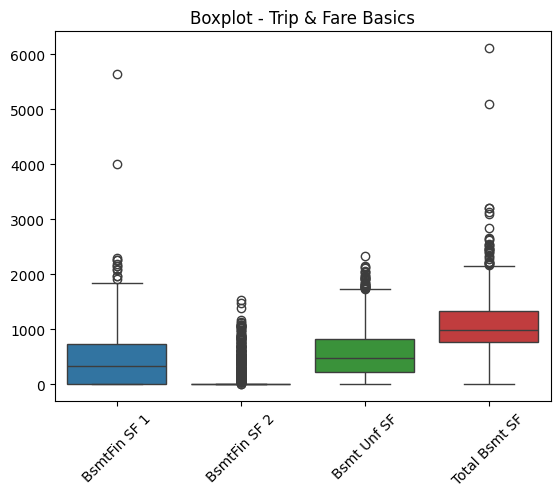

In [ ]:
#getting to know the numerical data before assesing if they have to filled with the mean or median
sns.boxplot(data=df_combined[num_bas])
plt.title("Boxplot - Trip & Fare Basics")
plt.xticks(rotation=45)
plt.show()

Due to a lot of outliers being present, the missing values would be imputed with the median

In [ ]:
for col in num_bas:
    median_val = df_combined[col].median()
    df_combined[col] = df_combined[col].fillna(median_val)

In [ ]:
df_combined['Electrical'].value_counts()

,count
Electrical,
SBrkr,2296
FuseA,138
FuseF,44
FuseP,7
Mix,1


In [ ]:
df_combined['Electrical'].isnull().sum()

np.int64(1)

since only 1 value is missing it most likely that the house has electrical but the type was simply not mentioned. So, lets fill that value with the mode SBrkr to avoid introducing bias

In [ ]:
df_combined['Electrical'] = df_combined['Electrical'].fillna(df_combined['Electrical'].mode()[0])

### **Handle Outliers:**

To handle outliers let us asses the type of data for the numeric columns in the data set. For ease of plotting and to avoid scaling issues, lets seperate the variables with closest scales as below to get a broader overview of the data in each numeric columns.

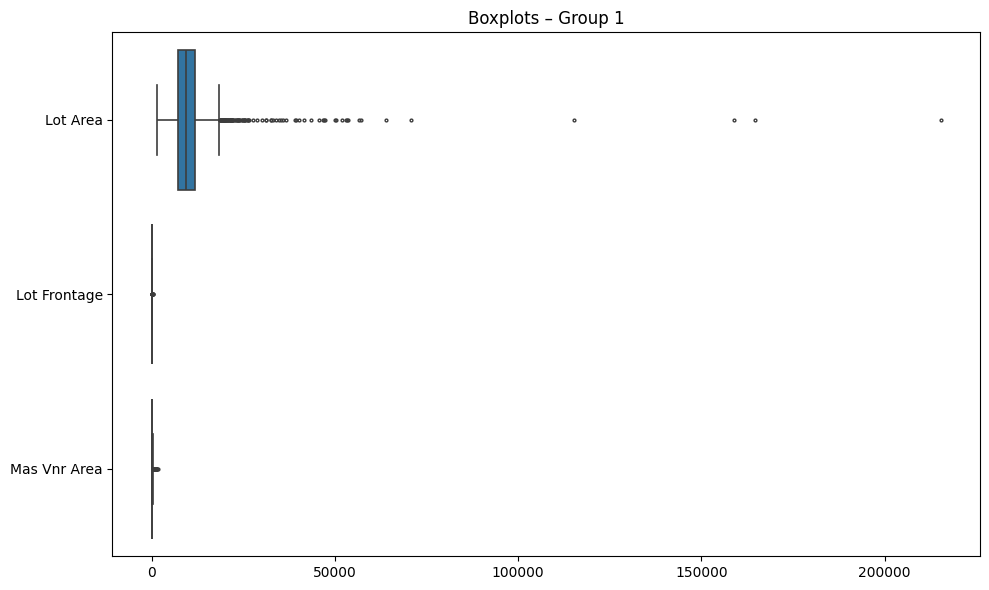

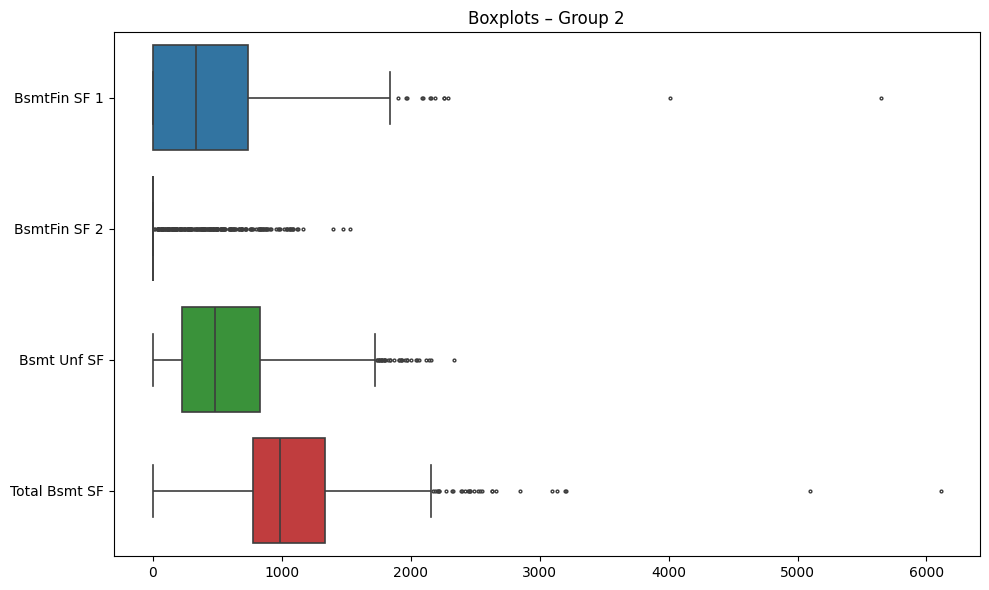

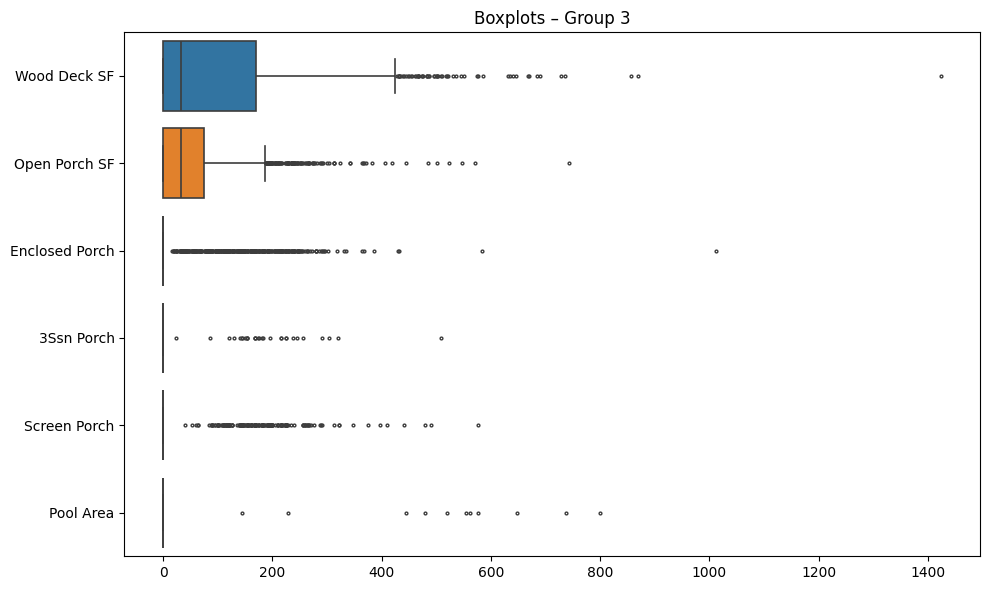

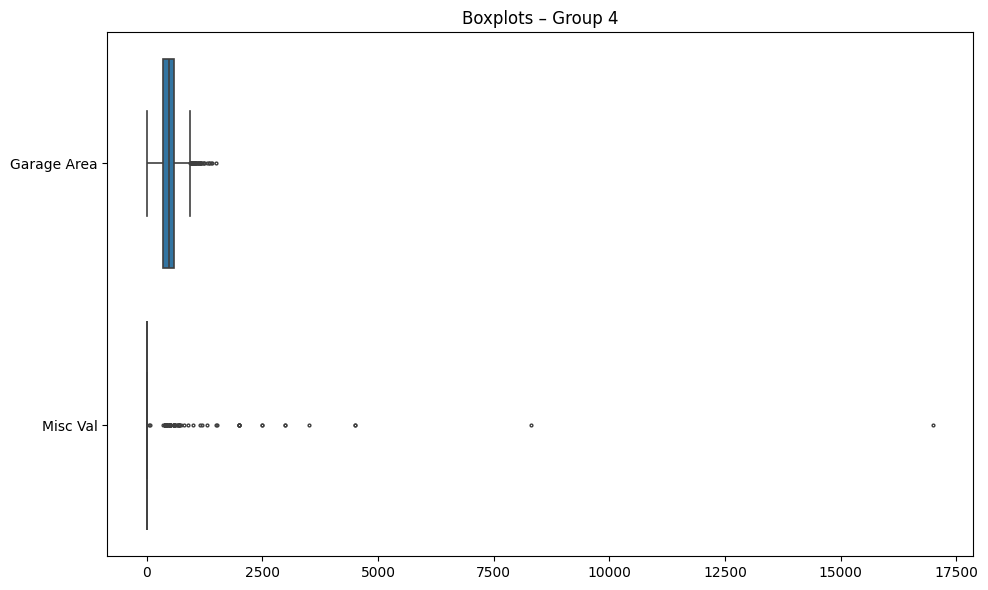

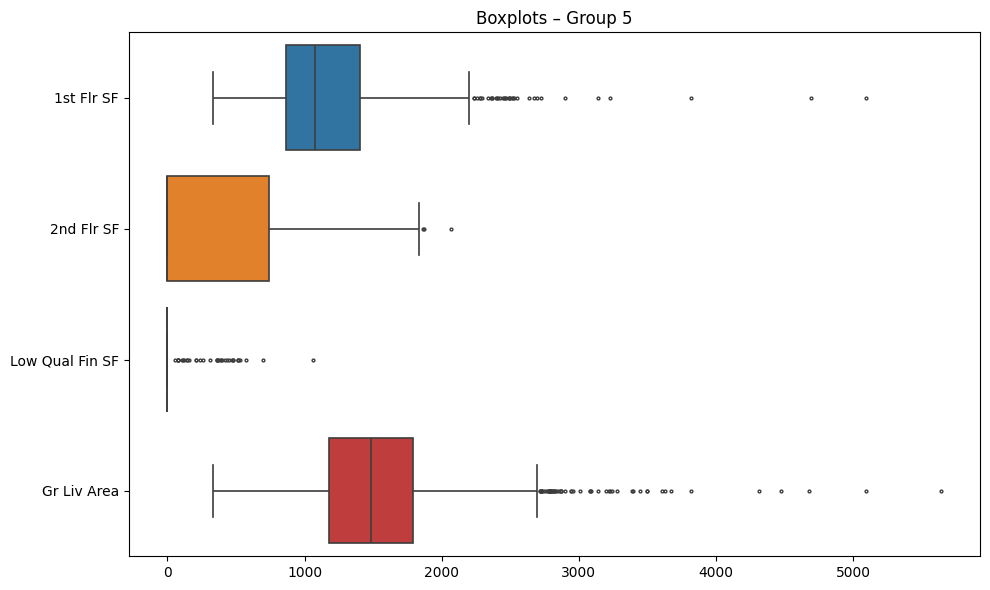

In [ ]:
# continuous variables are split into smaller sub groups with simialr scales so as to make plotting and intrpretting data easier:
group1 = ['Lot Area', 'Lot Frontage', 'Mas Vnr Area']
group2 = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']
group3 = ['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area']
group4 = ['Garage Area', 'Misc Val']
group5 = ['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area']

for i, group in enumerate([group1, group2, group3, group4, group5], start=1):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_combined[group], orient='h', linewidth=1.2, fliersize=2)
    plt.title(f'Boxplots – Group {i}')
    plt.tight_layout()
    plt.show()


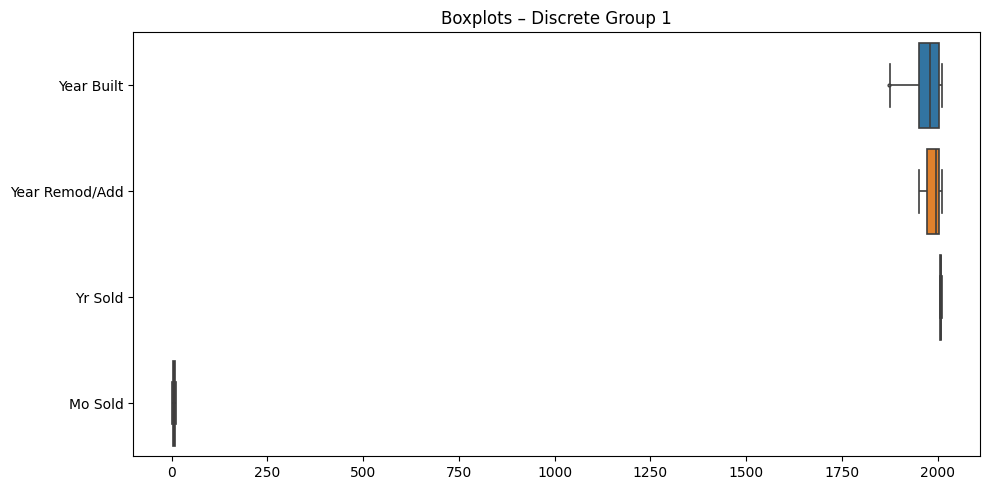

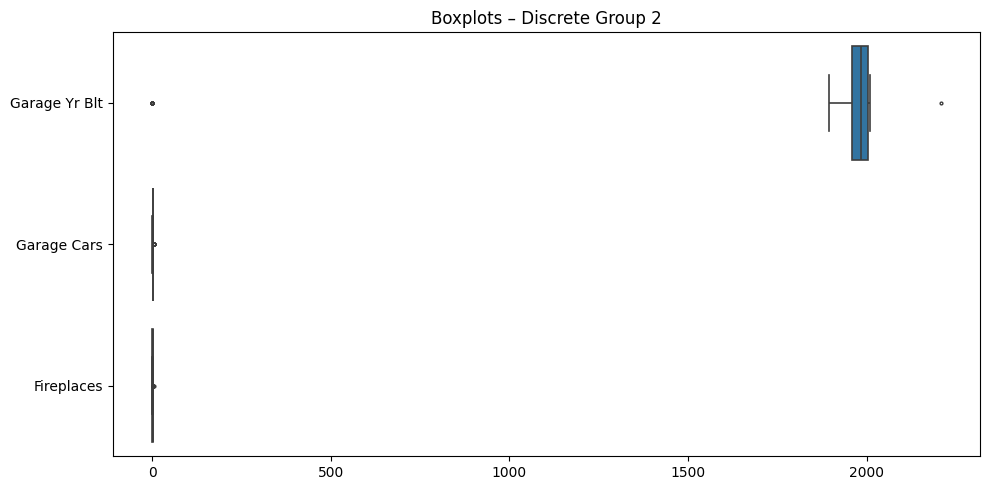

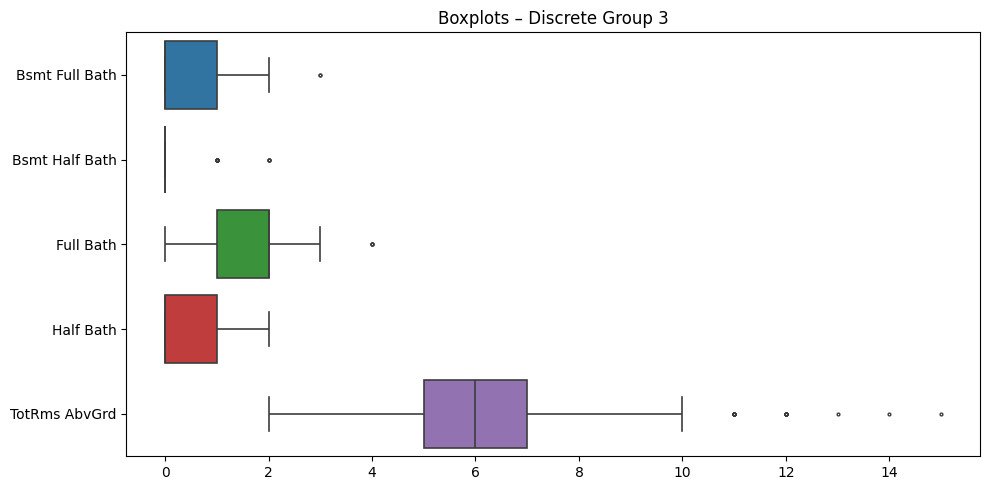

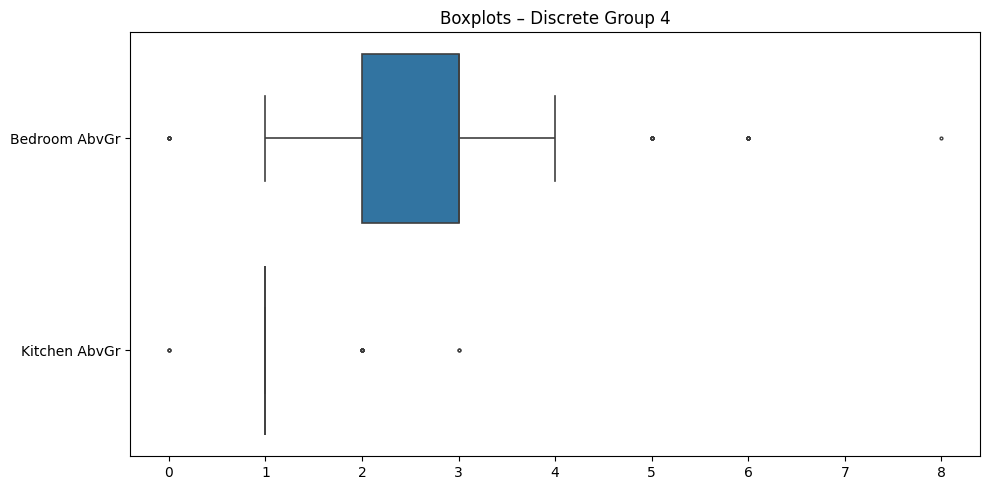

In [ ]:
discrete_group1 = ['Year Built', 'Year Remod/Add', 'Yr Sold', 'Mo Sold']
discrete_group2 = ['Garage Yr Blt', 'Garage Cars', 'Fireplaces']
discrete_group3 = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'TotRms AbvGrd']
discrete_group4 = ['Bedroom AbvGr', 'Kitchen AbvGr']

for i, group in enumerate([discrete_group1,discrete_group2,discrete_group3,discrete_group4], start=1):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_combined[group], orient='h', linewidth=1.2, fliersize=2)
    plt.title(f'Boxplots – Discrete Group {i}')
    plt.tight_layout()
    plt.show()

From the box plots, it is observed that the following columns had outliers:

Lot Area,

BsmtFin SF 1,

BsmtFin SF 2',

'Bsmt Unf SF',

'Total Bsmt SF'

Wood Deck SF',

'Open Porch SF',

'Enclosed Porch',

 '3Ssn Porch',

 'Screen Porch',

 'Pool Area

'Misc Val'

'1st Flr SF',

 '2nd Flr SF',

 'Low Qual Fin SF',

 'Gr Liv Area'

 Garage Yr Blt,

  Bsmt Full Bath',
  
  'Bsmt Half Bath',
  
  'Full Bath',
  
  TotRms AbvGrd
  
  'Bedroom AbvGr',
  
  'Kitchen AbvGr'

For the garage year built column although some outliers were observed they were not completely out of order values. So the outlier is retained.


For the remaining columns, before dealing with the outliers, lets check the top sales price for the columns to see so if the pattern of values impacts the sale price before dropping outliers or capping or binning them.

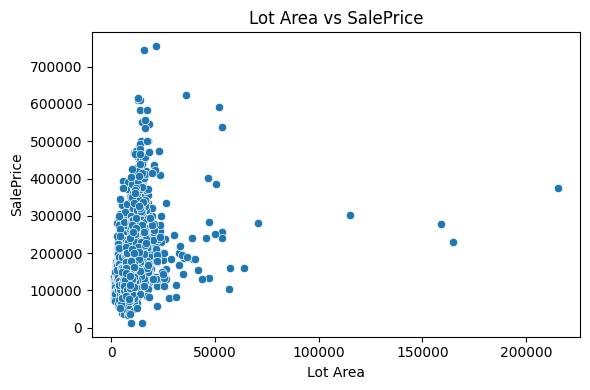

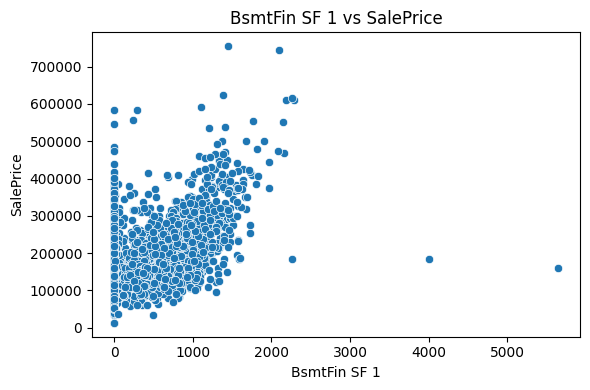

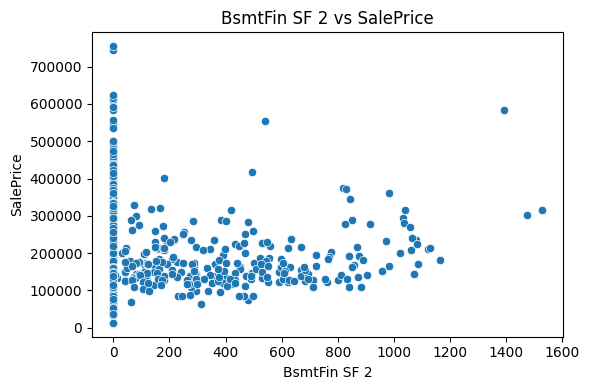

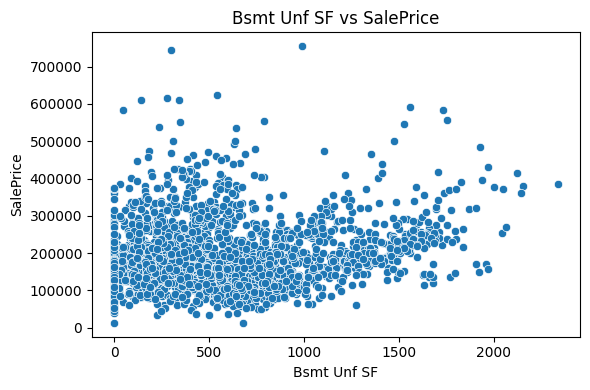

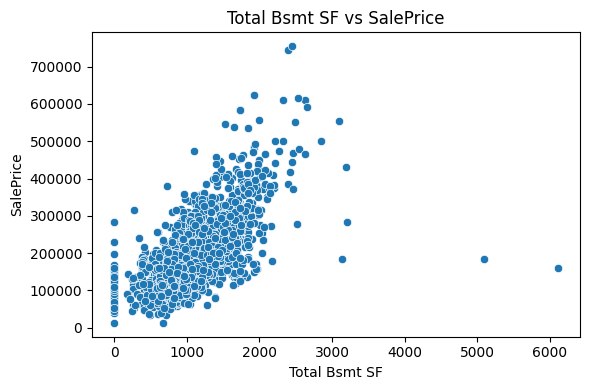

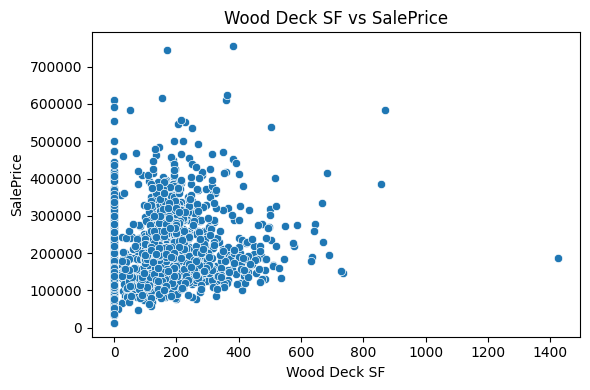

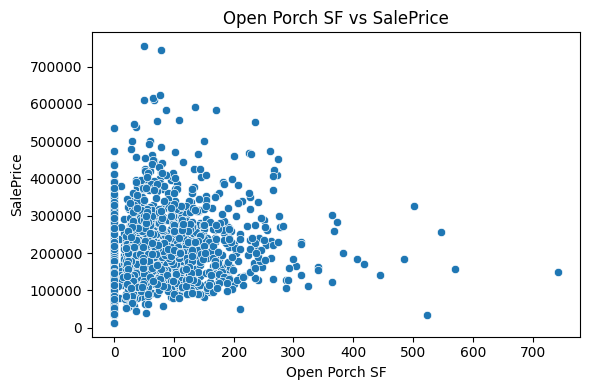

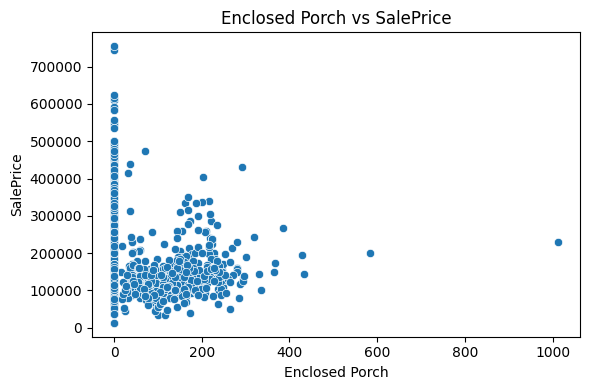

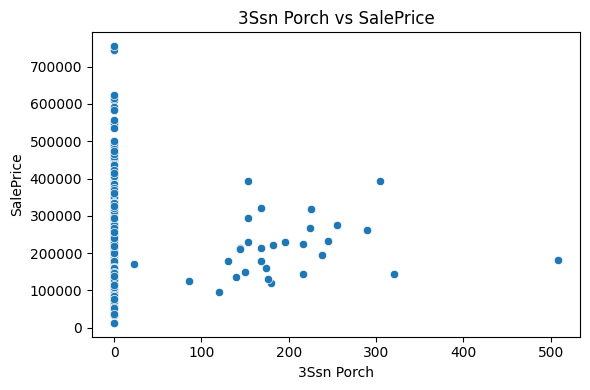

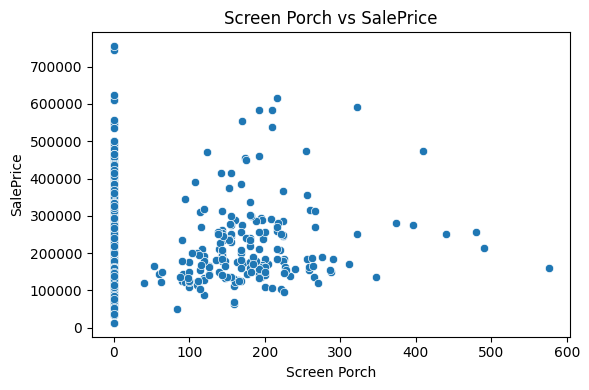

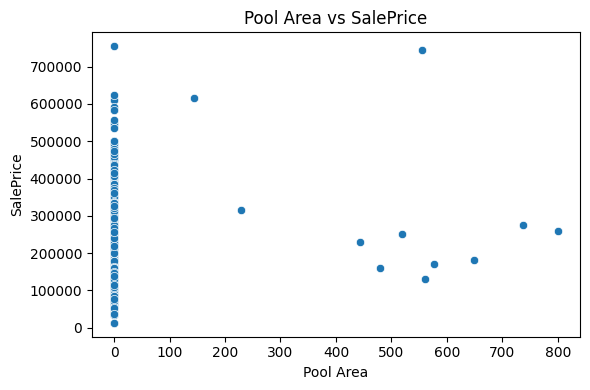

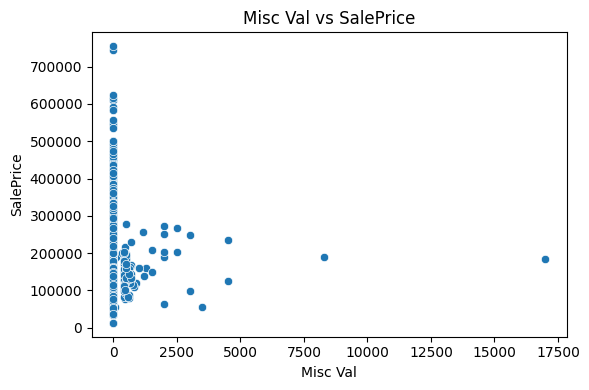

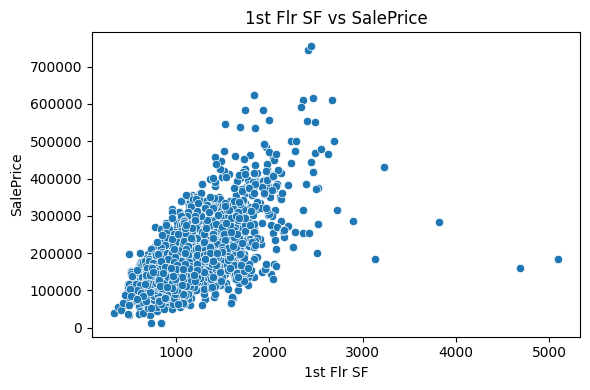

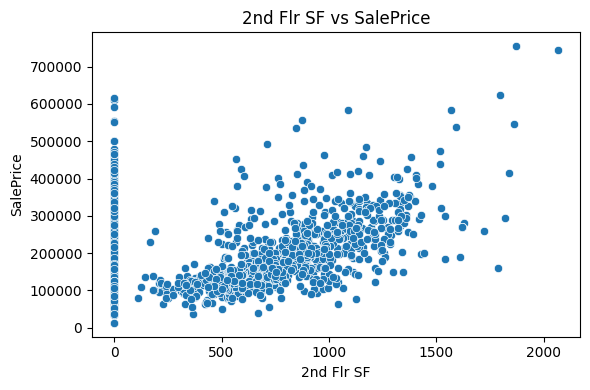

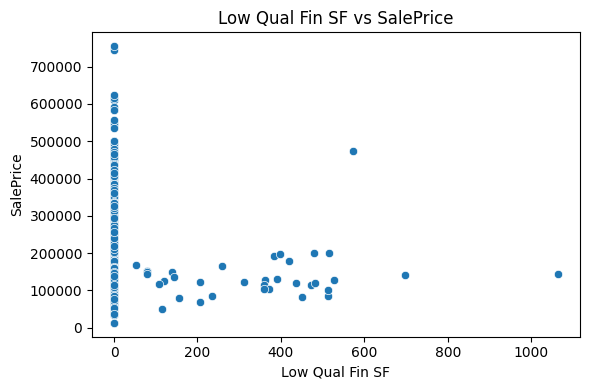

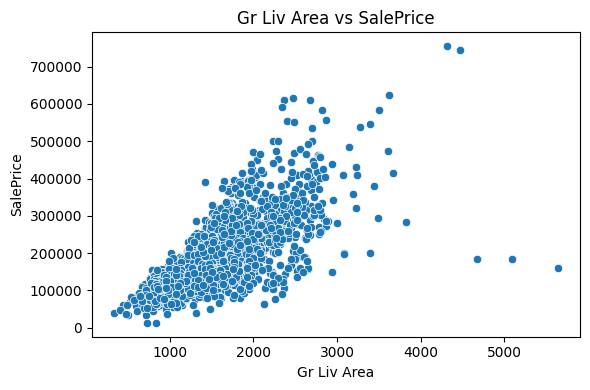

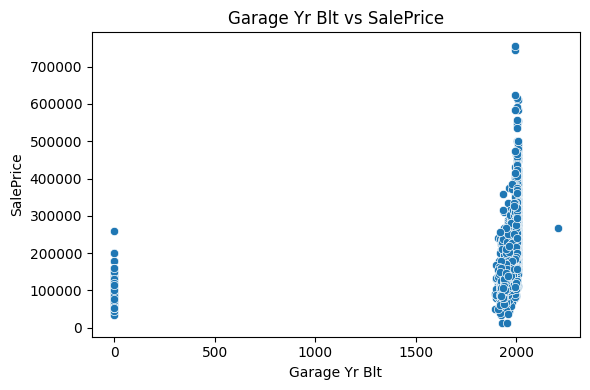

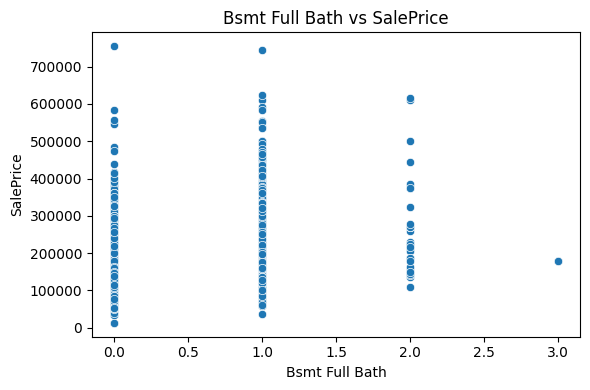

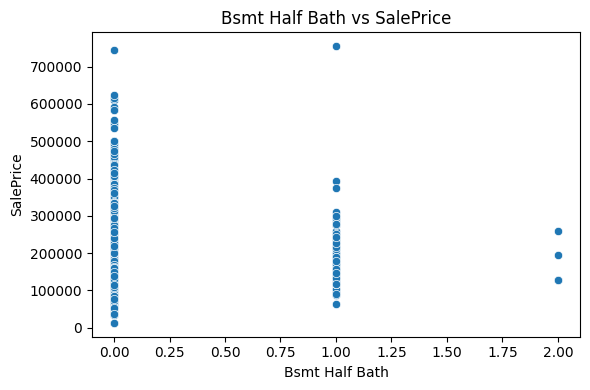

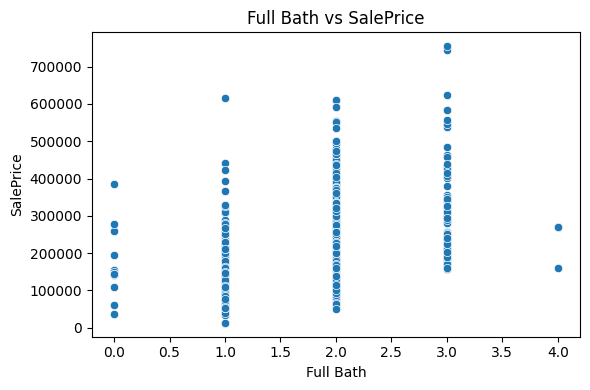

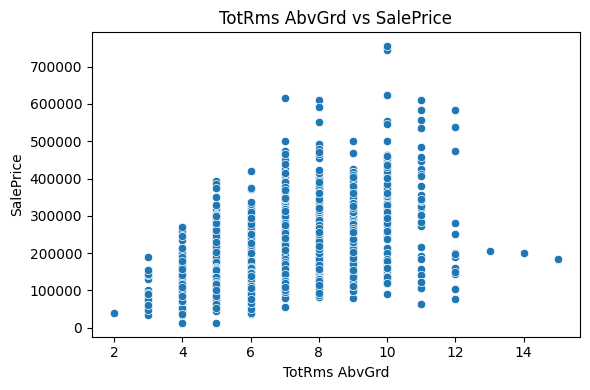

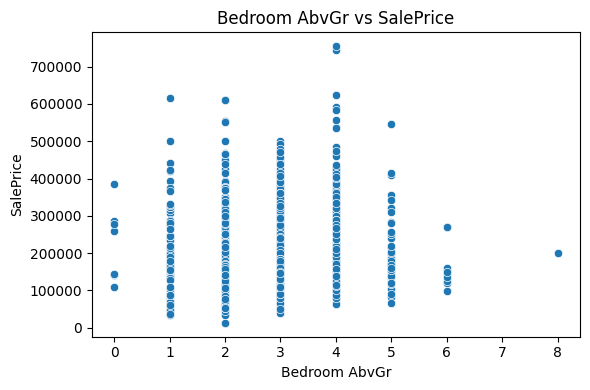

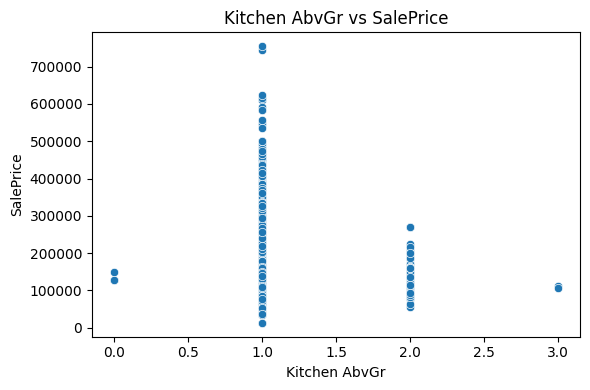

In [ ]:
outlier_features = [
    'Lot Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
    'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
    'Pool Area', 'Misc Val', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
    'Gr Liv Area', 'Garage Yr Blt', 'Bsmt Full Bath', 'Bsmt Half Bath',
    'Full Bath', 'TotRms AbvGrd', 'Bedroom AbvGr', 'Kitchen AbvGr'
]
for col in outlier_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_combined[col], y=df_combined['SalePrice'])
    plt.title(f'{col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()

For the 2nd Flr SF, although there are outliers, the sale price is observed to increase with the increase in the value and also the values increase consistently. Thus the outlier is maintained as is for analysis of the feature's impact on the sale price.

In [ ]:
df_combined.sort_values('SalePrice', ascending=False)[['SalePrice'] + outlier_features].head(10)

,SalePrice,Lot Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Yr Blt,Bsmt Full Bath,Bsmt Half Bath,Full Bath,TotRms AbvGrd,Bedroom AbvGr,Kitchen AbvGr
1291,755000,21535,1455.0,0.0,989.0,2444.0,382,50,0,0,0,0,0,2444,1872,0,4316,1994.0,0.0,1.0,3,10,4,1
1284,745000,15623,2096.0,0.0,300.0,2396.0,171,78,0,0,0,555,0,2411,2065,0,4476,1996.0,1.0,0.0,3,10,4,1
1792,625000,35760,1387.0,0.0,543.0,1930.0,361,76,0,0,0,0,0,1831,1796,0,3627,1995.0,1.0,0.0,3,10,4,1
773,615000,12720,2257.0,0.0,278.0,2535.0,154,65,0,0,216,144,0,2470,0,0,2470,2003.0,2.0,0.0,1,7,1,1
34,611657,12919,2188.0,0.0,142.0,2330.0,0,67,0,0,0,0,0,2364,0,0,2364,2009.0,1.0,0.0,2,11,2,1
310,610000,13693,2288.0,0.0,342.0,2630.0,360,50,0,0,0,0,0,2674,0,0,2674,2007.0,2.0,0.0,2,8,2,1
1175,591587,51974,1101.0,0.0,1559.0,2660.0,0,135,0,0,322,0,0,2338,0,0,2338,2005.0,1.0,0.0,2,8,4,1
1797,584500,17242,292.0,1393.0,48.0,1733.0,870,86,0,0,210,0,0,1933,1567,0,3500,1993.0,1.0,0.0,3,11,4,1
311,582933,13891,0.0,0.0,1734.0,1734.0,52,170,0,0,192,0,0,1734,1088,0,2822,2009.0,0.0,0.0,3,12,4,1
1686,556581,16056,240.0,0.0,1752.0,1992.0,214,108,0,0,0,0,0,1992,876,0,2868,2005.0,0.0,0.0,3,11,4,1


In [ ]:
df_combined['Lot Area'].quantile([0.10,0.25,0.5,0.75,0.85,0.95,0.99,0.995,1.00])

,Lot Area
0.100,4386.80
0.250,7200.00
0.500,9382.00
0.750,11691.00
0.850,13218.50
0.950,17430.00
0.990,35220.78
0.995,50198.33
1.000,215245.00


So from  quantile distribuition, it is observed that 99.5% of the data is below 50198.33. Also, from the the scatter plot it is observed how the increase in lot area does not impact the increase in the sale price. So the outlier is capped in this case to deal with the skewness of the Lot area attribute.

In [ ]:
cap_lot_area = df_combined['Lot Area'].quantile(0.995)
df_combined['Lot Area'] = np.where(df_combined['Lot Area'] > cap_lot_area, cap_lot_area, df_combined['Lot Area'])

'BsmtFin SF 1', 'Total Bsmt SF', 'Wood Deck SF', 'Enclosed Porch', '3Ssn Porch',Screen Porch', 'Pool Area', 'Misc Val', '1st Flr SF', 'Gr Liv Area', Open Porch SF,- these variables as well seem to behave the same way as the Lot area with repect to the sale price. The Sale price is not increasing with the increased outlier values of these attributes. due to which capping them could make these attributes less skewed without impacting the analysis of their relationship with the target variable

check the quantile values for all these variables and see if 0.995 is right value or not. especially for gr liv area.

In [ ]:
#Check the quantiles for these plots to know how they vary for the graphs which do not have sale price increase with their outlier values and so can be capped.
quantiles_to_check = [0.10, 0.20, 0.50, 0.75, 0.90, 0.99, 0.995,0.999,0.9995,1.00]

outlier_cols = [
    'BsmtFin SF 1', 'Total Bsmt SF', 'Wood Deck SF', 'Enclosed Porch',
    '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
    '1st Flr SF', 'Gr Liv Area'
]

# Calculate the quantiles
quantile_summary = df_combined[outlier_cols].quantile(quantiles_to_check)
quantile_summary

,BsmtFin SF 1,Total Bsmt SF,Wood Deck SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,1st Flr SF,Gr Liv Area
0.1000,0.000,598.400,0.000,0.000,0.000,0.00,0.000,0.0,728.000,936.000
0.2000,0.000,728.000,0.000,0.000,0.000,0.00,0.000,0.0,827.000,1092.000
0.5000,331.000,981.500,32.000,0.000,0.000,0.00,0.000,0.0,1079.000,1486.000
0.7500,739.000,1331.000,170.000,0.000,0.000,0.00,0.000,0.0,1405.000,1788.000
0.9000,1088.800,1629.000,263.400,112.000,0.000,0.00,0.000,0.0,1682.800,2212.800
0.9900,1663.080,2216.560,503.840,264.000,140.560,256.00,0.000,700.0,2368.780,2946.540
0.9950,1874.760,2510.240,611.650,293.570,181.140,287.57,0.000,2000.0,2518.990,3392.850
0.9990,2274.392,3203.084,798.194,430.542,297.196,460.56,613.008,4500.0,3532.288,4578.800
0.9995,3591.554,4635.973,866.841,547.064,316.112,487.57,716.130,7376.6,4480.104,4993.183
1.0000,5644.000,6110.000,1424.000,1012.000,508.000,576.00,800.000,17000.0,5095.000,5642.000


In [ ]:
#checking the pool area variable to get a sense of why the median is 0 in it.
df_combined['Pool Area'].value_counts()

,count
Pool Area,
0,2476
144,1
480,1
576,1
555,1
444,1
228,1
561,1
519,1


From the above it is seen that the outliers are skewing the data when comparing the 50th percentile value and the 100th percentile value. So to deal with the outliers in these columns, it would be better to cap them as from the scatter plot too we have observed that there are not impact of the high outliers values with increase ihn the sale price.

In [ ]:

def cap_outliers(df, columns, quantile=0.9995):
    for col in columns:
        cap_value = df[col].quantile(quantile)
        df[col] = np.where(df[col] > cap_value, cap_value, df[col])
    return df

outlier_cols = [
    'BsmtFin SF 1', 'Total Bsmt SF', 'Wood Deck SF', 'Enclosed Porch', '3Ssn Porch',
    'Screen Porch', 'Pool Area', 'Misc Val', '1st Flr SF', 'Gr Liv Area'
]

df_combined = cap_outliers(df_combined, outlier_cols)

For the remaining attributes:

'Bedroom AbvGr',

'TotRms AbvGrd',

 'Bsmt Unf SF',

 'Open Porch SF',

 'Low Qual Fin SF',
 '
 Bsmt Half Bath',


 'BsmtFin SF 2',

 'Kitchen AbvGr',

 'Full Bath',

 'Bsmt Full Bath'

For these attributes although, the sale price is observed to be impacted, at the outlier values it is not observed to be high. So We can handle them by Capping as well.

In [ ]:
quantiles_to_check = [0.10, 0.20, 0.50, 0.75, 0.90, 0.99, 0.995,0.999,0.9995,1.00]

outlier_cols_2 = [
    'Kitchen AbvGr', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Bsmt Full Bath',
    'Bsmt Half Bath', 'Bsmt Unf SF', 'Low Qual Fin SF', 'Open Porch SF', 'BsmtFin SF 2'
]

# Calculate the quantiles
quantile_summary_2 = df_combined[outlier_cols_2].quantile(quantiles_to_check)
quantile_summary_2

,Kitchen AbvGr,Bedroom AbvGr,TotRms AbvGrd,Bsmt Full Bath,Bsmt Half Bath,Bsmt Unf SF,Low Qual Fin SF,Open Porch SF,BsmtFin SF 2
0.1000,1.000,2.0,5.000,0.000,0.0,55.000,0.000,0.000,0.000
0.2000,1.000,2.0,5.000,0.000,0.0,179.000,0.000,0.000,0.000
0.5000,1.000,3.0,6.000,0.000,0.0,484.000,0.000,32.000,0.000
0.7500,1.000,3.0,7.000,1.000,0.0,829.000,0.000,75.000,0.000
0.9000,1.000,4.0,9.000,1.000,0.0,1243.600,0.000,136.000,2.400
0.9900,2.000,5.0,11.000,2.000,1.0,1774.420,162.860,287.140,876.260
0.9950,2.000,6.0,12.000,2.000,1.0,1923.850,410.110,364.570,1049.260
0.9990,2.000,6.0,12.514,2.000,2.0,2130.766,550.616,535.336,1281.706
0.9995,2.757,6.0,13.757,2.758,2.0,2149.841,666.625,564.411,1454.317
1.0000,3.000,8.0,15.000,3.000,2.0,2336.000,1064.000,742.000,1526.000


In [ ]:
df_combined['Kitchen AbvGr'].value_counts()

,count
Kitchen AbvGr,
1,2382
2,100
0,3
3,2


For Kitchen AbvGr column since it tells about the number of kitchen rooms in the property, it is discrete column, the outlier, 3, which represents 3 kitchens in the property are going to left out without being capped as:

1. It does not impact the sale price by increasing with the number of kitchens in the property.
2. Because of that very reason, leaving it behind so that it would be insightful and see how the investment in thisfeature is not highly impacting the sale price and cause revision in modelling the properties.

Similarly, the outliers in the columns Bsmt Full Bath, Bsmt Half Bath	are also not going to be handled as:

1. They are discrete columns
2. Also the high values are present only for few properties, which are not affecting the sales price , so can be used in the future steps to analyse how efficient is it in investing to increase these features to impact the sale price.

The remaining features would be capped for values above their 0.9995 percentile.

In [ ]:
outlier_cols_3=['Bedroom AbvGr', 'TotRms AbvGrd','Bsmt Unf SF', 'Low Qual Fin SF', 'Open Porch SF', 'BsmtFin SF 2']
def cap_outliers(df, columns, quantile=0.9995):
    for col in columns:
        cap_value = df[col].quantile(quantile)
        df[col] = np.where(df[col] > cap_value, cap_value, df[col])
    return df

df_combined = cap_outliers(df_combined, outlier_cols_3)

Handle outliers effectively for each of the above attribute

Then analyse the impact of sales price overall across all the categorical and numerical variables

Amongst that shortlist the variables for which the sales price is high and the sales price is related to it.

Now for categorical variables, as part of cleaning the data, lets check if there are any spelling errors or unusual data entry error for the columns which did not have any missing values and were probed earlier.

In [ ]:
categorical_count=[ 'Sale Type', 'Sale Condition', 'Functional','Heating', 'Heating QC', 'Central Air','Utilities', 'Lot Config','Neighborhood','MS SubClass']
for i in categorical_count:
  print(df_combined[i].value_counts())


Sale Type
WD       2129
New       239
COD        60
ConLD      23
CWD         9
ConLI       8
ConLw       8
Con         5
Oth         5
VWD         1
Name: count, dtype: int64
Sale Condition
Normal     2018
Partial     244
Abnorml     151
Family       38
Alloca       24
AdjLand      12
Name: count, dtype: int64
Functional
Typ     2327
Min2      62
Min1      39
Mod       31
Maj1      18
Maj2       7
Sal        2
Sev        1
Name: count, dtype: int64
Heating
GasA     2448
GasW       25
Grav        9
Wall        2
OthW        2
Floor       1
Name: count, dtype: int64
Heating QC
Ex    1384
TA     650
Gd     377
Fa      73
Po       3
Name: count, dtype: int64
Central Air
Y    2305
N     182
Name: count, dtype: int64
Utilities
AllPub    2484
NoSewr       2
NoSeWa       1
Name: count, dtype: int64
Lot Config
Inside     1823
Corner      413
CulDSac     168
FR2          69
FR3          14
Name: count, dtype: int64
Neighborhood
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt

Since there are no explicit outliers or unexpected categories the categorical variables are clean and the next step of analysis is being proceeded.

Outlier Handling Summary

**Outliers Retained**

2nd Flr SF: Outliers are retained as higher values consistently correspond with an increase in sale price.

Garage Yr Blt: Outliers are within a reasonable range and not considered erroneous; therefore, they are retained.

**Outliers Capped**

To reduce skewness without affecting the relationship with the target variable, the following variables have been capped:

Lot Area: Capped at the 99.5th percentile (~50,198.33) due to lack of correlation with sale price beyond this threshold.

Variables showing similar patterns to Lot Area (no significant increase in sale price at higher values):

BsmtFin SF 1

Total Bsmt SF

Wood Deck SF

Enclosed Porch

3Ssn Porch

Screen Porch

Pool Area

Misc Val

1st Flr SF

Gr Liv Area

Open Porch SF

Additional variables where outliers have minimal impact on sale price and are thus capped:

Bedroom AbvGr

TotRms AbvGrd

Bsmt Unf SF

Low Qual Fin SF

BsmtFin SF 2

Full Bath

**Outliers Not Capped (Discrete or Contextually Relevant)**

Kitchen AbvGr: Although the value "3" is an outlier, it is retained due to its discreteness and potential analytical value in evaluating the significance of additional kitchens.

Bsmt Full Bath and Bsmt Half Bath: Outliers are retained as they are rare, discrete values with minimal impact on sale price. These features will be further analyzed for their influence on pricing.

**Categorical Variables**


No explicit outliers or invalid categories were observed; data is considered clean and ready for the next phase of analysis.


## **Multivariate analysis:**

For getting an overview, of the overall factors that have linear relationship with the sale price the different columns are grouped into 17 groups targetting similar factors.

In [ ]:
grouped_features = {
    "Group 1 - Dwelling Type": ['MS SubClass', 'Bldg Type', 'House Style'],
    "Group 2 - Zoning": ['MS Zoning'],
    "Group 3 - Land Area": ['Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Lot Config', 'Land Slope'],
    "Group 4 - Locality & Proximity": ['Neighborhood', 'Condition 1', 'Condition 2'],
    "Group 5 - Material Quality": ['Overall Qual'],
    "Group 6 - Overall Condition": ['Overall Cond'],
    "Group 7 - Exterior": ['Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
                           'Exter Qual', 'Exter Cond', 'Foundation'],
    "Group 8 - Basement": ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
                           'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'],
    "Group 9 - Utilities": ['Utilities', 'Heating', 'Heating QC', 'Central Air', 'Electrical'],
    "Group 10 - Time": ['Year Built', 'Year Remod/Add', 'Mo Sold', 'Yr Sold'],
    "Group 11 - Floor SF": ['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area'],
    "Group 12 - Rooms": ['Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd'],
    "Group 13 - Functionality": ['Functional'],
    "Group 14 - Fireplaces": ['Fireplaces', 'Fireplace Qu'],
    "Group 15 - Garage": ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond'],
    "Group 16 - Exterior Features": ['Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
                                     'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val'],
    "Group 17 - Sale Info": ['Sale Type', 'Sale Condition']
}


In [ ]:
# Prepare DataFrame with correlations
group_corrs = []
for group_name, cols in grouped_features.items():
    temp_cols = [col for col in cols if col in df_combined.columns]
    temp_df = df_combined[temp_cols + ['SalePrice']].copy()
    temp_df = pd.get_dummies(temp_df, drop_first=True)
    correlations = temp_df.corr()['SalePrice'].drop('SalePrice').abs()
    mean_corr = correlations.mean()
    group_corrs.append((group_name, mean_corr))


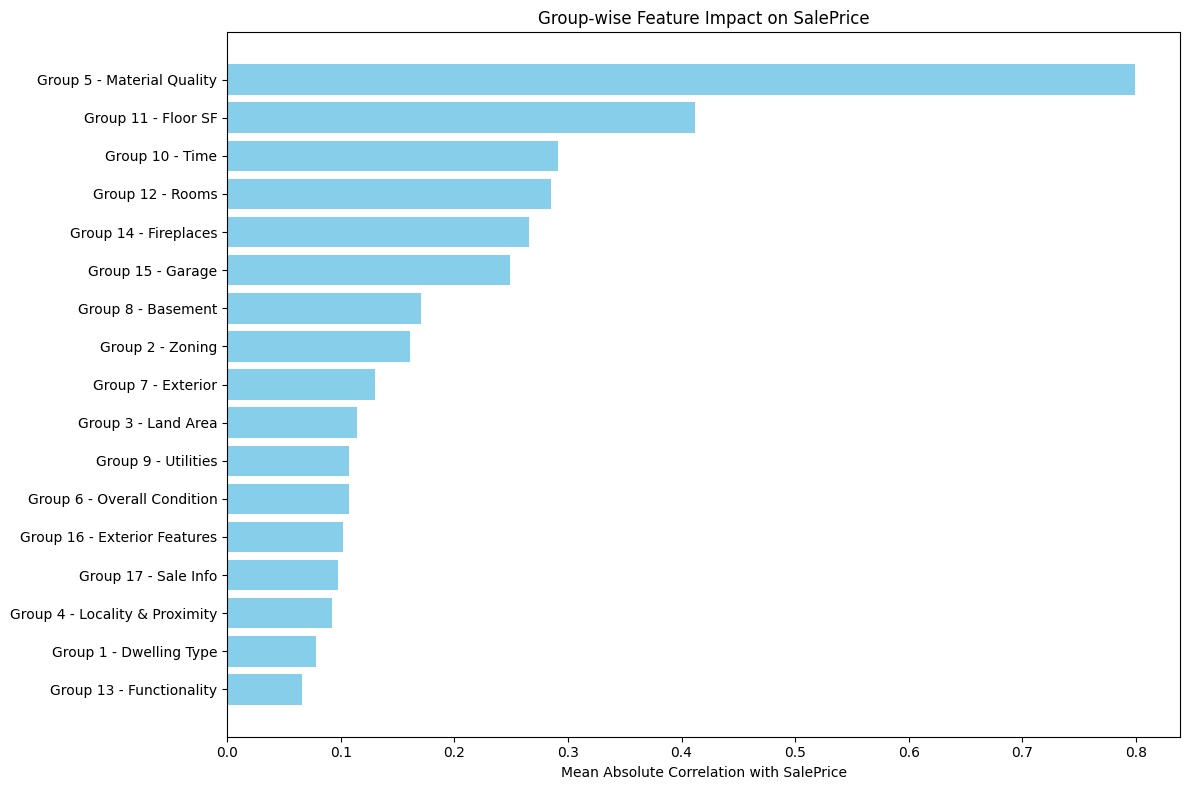

In [ ]:
# Convert to DataFrame
group_corr_df = pd.DataFrame(group_corrs, columns=["Group", "Mean Absolute Correlation"])
group_corr_df.sort_values(by="Mean Absolute Correlation", ascending=False, inplace=True)

#plotting a mean correlation barchart to firstly get an overview of which features have what sort of an impact on the sale price.
plt.figure(figsize=(12, 8))
plt.barh(group_corr_df["Group"], group_corr_df["Mean Absolute Correlation"], color='skyblue')
plt.xlabel("Mean Absolute Correlation with SalePrice")
plt.title("Group-wise Feature Impact on SalePrice")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

From the mean correlation relation of the different features with the sales price, it is observed that:


 1. the material quality which depicts the overall quality of the house is the most influential in deciding the sales price

2. Floor square feet is second important criteria. So with increase in the square feet there is increase in the price of the property.
3. time: So mostly the newly renovated properties, the month and year a property is sould seems to impact the sale price.

4. even the number of rooms seem to offer a higher impact with the sales price. more number of rooms tends to cause an increase in the price of the property.

5. The presence of good fire place and garage seems to be next important factors for the sale price.

6. However, on the other hand, the dwelling type as to whether dwellling type and functionality seems to be having lowest correlation.

7. Also the sale info doesnt seem to hava a high impact on the sale price as irrespective of how the payment is made, the property attributes is what tends to impact the price. eg: if an iphone is sold in Amazon or bought instore, the price is based on the product right...

8. Exterior features also do not tend to be present in most homes. So probably the few homes in which they are present are not seen to impact the price of the property increase. Thus they have less impact.


### **Questions to Ponder:**



1.How does the zoning of the property impact the price? Ms Zoning

 1.1 Do commercial properties cost more? MsZoning
 1.2 Classify the highest and the lowest zones cost

2.how important are factors such as Lot frontage, Lot area impact the price of the house?



3.How does lot shape( the irregularityness of the property)  impact its price?Lot Shape  

4.Could utilities provided impact the cost of the property sold?

5.Does miscellaneous feature like elevators/tennis court tends to add value to the property?

6.how does investing in exterior features like fencing and porches impact the price of the house?

6.1. Does quality of fencing affect the price of the property?

7.Is there any significant difference in price between a property with a finished garage vs an unfinished garage?

8.Compared to houses not remodelled does remodelled houses are sold at a higher price?

9.Which type of heating tends to be sold at a higher price?

10.Are finished basements tend to sold at a higher price? Is it worth putting in that effort in maintaining its quality furnishing and even area? How do they all impact the cost?

11.In what way foundation material used of a house impact its cost?

12.Is there any specific neighbourhood that the houses are sold at a higher price?

13.which month there are a lot of houses being sold at high prices?

14.Are all large houses with high square feet tend to sold at a higher price than smaller sized houses?




 **1.How does the sale price vary from with zones?  Do commercial properties cost more?**

To find the answer, lets plot a bar chart comparing the sale price for each zone

       A        Agriculture
       C        Commercial
       FV        Floating Village Residential
       I        Industrial
       RH        Residential High Density
       RL        Residential Low Density
       RP        Residential Low Density Park
       RM        Residential Medium Density


In [ ]:
df_combined['MS Zoning'].value_counts()

,count
MS Zoning,
RL,1837
RM,462
FV,139
C (all),25
RH,20
A (agr),2
I (all),2


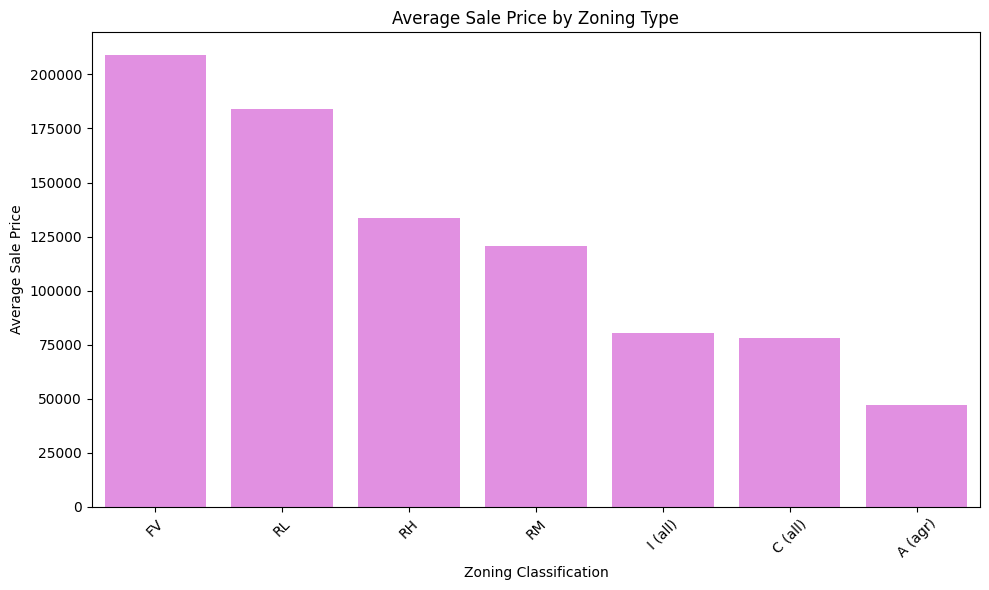

In [ ]:
# Step 1: Compute average sale price per zone
zoning_avg = df_combined.groupby('MS Zoning')['SalePrice'].median().sort_values(ascending=False).reset_index()

# Step 2: Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=zoning_avg, x='MS Zoning', y='SalePrice', color='violet')
plt.title('Average Sale Price by Zoning Type')
plt.ylabel('Average Sale Price')
plt.xlabel('Zoning Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As seen from above, although the commercial and industial properties sale price is higher than agricultural land, it is seen that the Floating Village Residential sale price is the highest with the Residential Low Density being second highest in the sale price respectively and also the most number of zone type being sold forms the backbone of the Ames housing. Residential high and medium tend to be average in the pricing for the residential properties.

**2.How important are factors such as Lot frontage, Lot area impact the price of the house?**

To understand the relationship of lot frontage (Linear feet of street connected to the property) and Lot area (Total area of the lot (in sq. ft)) lets find their correlation with the sale price. Following that through a scatter plot, how spread out the data is.

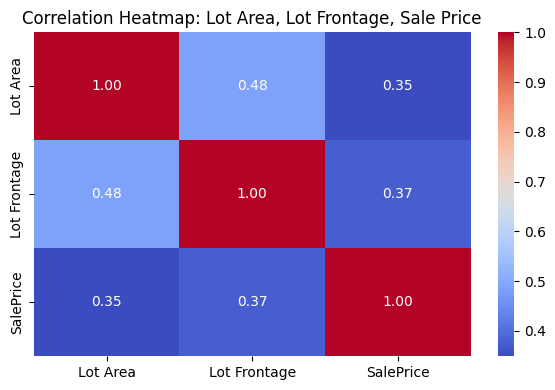

In [ ]:
#Calculate the correlation of the Lot area and the Lot Frontage with the sale price

# Correlation matrix
corr_matrix = df_combined[['Lot Area', 'Lot Frontage', 'SalePrice']].corr()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Lot Area, Lot Frontage, Sale Price')
plt.tight_layout()
plt.show()

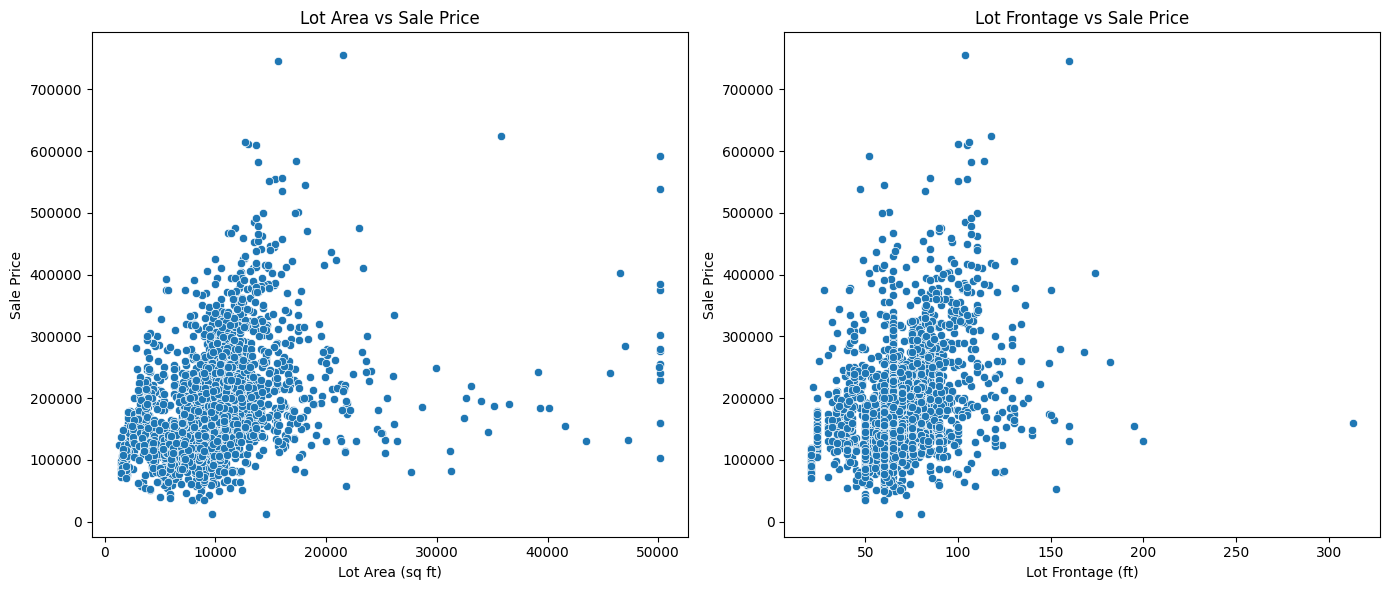

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Lot Area vs SalePrice
sns.scatterplot(data=df_combined, x='Lot Area', y='SalePrice', ax=axes[0])
axes[0].set_title('Lot Area vs Sale Price')
axes[0].set_xlabel('Lot Area (sq ft)')
axes[0].set_ylabel('Sale Price')

# Lot Frontage vs SalePrice
sns.scatterplot(data=df_combined, x='Lot Frontage', y='SalePrice', ax=axes[1])
axes[1].set_title('Lot Frontage vs Sale Price')
axes[1].set_xlabel('Lot Frontage (ft)')
axes[1].set_ylabel('Sale Price')

plt.tight_layout()
plt.show()

While Lot Area and Lot Frontage slightly affect the sale price, they’re not the strongest predictors. Other features like floor square footage, quality of materials, and neighborhood tend to have a much stronger impact. However, from the scatter plot, it is bserved that around 15000 sqft Lot Area and 125 ft Lot frontage the sale price is observed to be high.

In [ ]:
# Select properties with Lot Area ~15,000 and Frontage ~125
subset = df_combined[(df_combined['Lot Area'] >= 14000) & (df_combined['Lot Area'] <= 20000) &
                     (df_combined['Lot Frontage'] >= 100) & (df_combined['Lot Frontage'] <= 150)]



In [ ]:
subset[['SalePrice', 'Lot Area', 'Lot Frontage', 'MS Zoning', 'House Style', 'Bldg Type', 'Neighborhood', 'Overall Qual']].sort_values(by='SalePrice', ascending=False)

,SalePrice,Lot Area,Lot Frontage,MS Zoning,House Style,Bldg Type,Neighborhood,Overall Qual
1797,584500,17242.0,114.0,RL,2Story,1Fam,NoRidge,9
301,555000,15431.0,105.0,RL,1Story,1Fam,NridgHt,10
334,552000,14836.0,100.0,RL,1Story,1Fam,NridgHt,10
36,500000,14300.0,110.0,RL,1Story,1Fam,NridgHt,9
299,462000,14257.0,110.0,RL,2Story,1Fam,NridgHt,9
1217,450000,15431.0,105.0,RL,1Story,1Fam,NridgHt,10
326,445000,15274.0,110.0,RL,1Story,1Fam,NridgHt,9
1223,440000,14977.0,110.0,RL,1Story,1Fam,NridgHt,8
777,421250,16900.0,130.0,RL,2Story,1Fam,NridgHt,8
1214,415298,14450.0,107.0,RL,1Story,1Fam,NridgHt,9


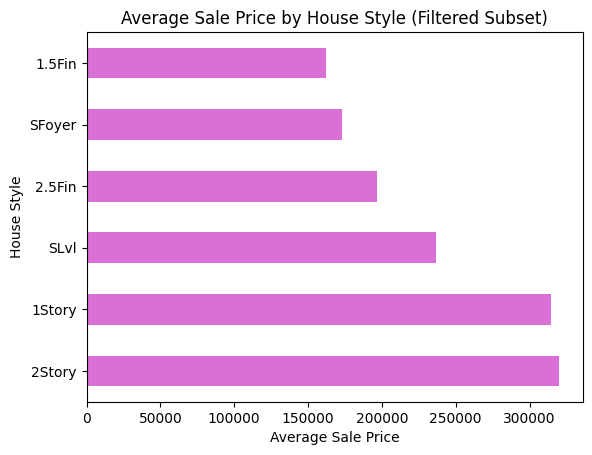

In [ ]:
subset.groupby('House Style')['SalePrice'].mean().sort_values(ascending=False).plot(kind='barh', color='orchid')
plt.title("Average Sale Price by House Style (Filtered Subset)")
plt.xlabel("Average Sale Price")
plt.ylabel("House Style")
plt.show()

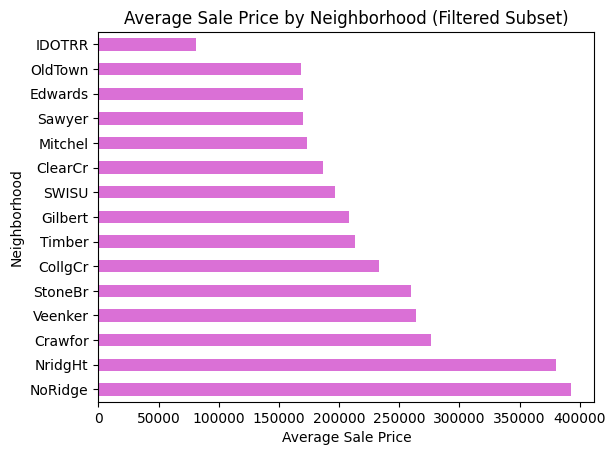

In [ ]:
subset.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).plot(kind='barh', color='orchid')
plt.title("Average Sale Price by Neighborhood (Filtered Subset)")
plt.xlabel("Average Sale Price")
plt.ylabel("Neighborhood")
plt.show()

Upon observing, the high priced lot frontage and Lot area tends to contribute to the 2story and 1 story house styles in the NoRidge and NoridgHT neighborhood.

 **3.How does lot shape( the irregularityness of the property) impact its price?**

Let's compare it with a Bar chart so see how the irregularity of the property impacts the price

       Reg        Regular        
       IR1        Slightly irregular
       IR2        Moderately Irregular
       IR3        Irregular


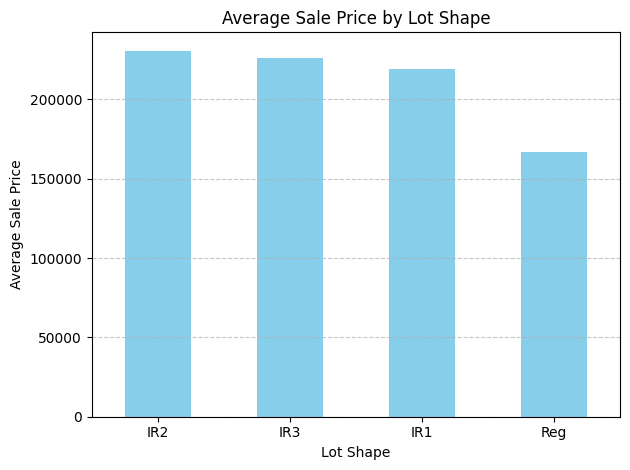

In [ ]:

# Calculate mean SalePrice for each Lot Shape
lotshape_avg = df_combined.groupby('Lot Shape')['SalePrice'].mean().sort_values(ascending=False)

# Plot bar chart
lotshape_avg.plot(kind='bar', color='skyblue')
plt.title("Average Sale Price by Lot Shape")
plt.ylabel("Average Sale Price")
plt.xlabel("Lot Shape")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Surprisingly, the regularly shaped plots are seen to be sold at a lesser prices than the irregular lot shapes. Let us compare the lot shape with lot area to know if irregular plots are sold at a higher price since they come in bigger sizes.

In [ ]:
df_combined.groupby('Lot Shape')[['Lot Area', 'SalePrice']].mean().sort_values(by='SalePrice', ascending=False)

,Lot Area,SalePrice
Lot Shape,,
IR2,16576.168767,230681.027397
IR3,21475.777333,225817.666667
IR1,11415.652231,219363.475467
Reg,8729.631238,166851.727155


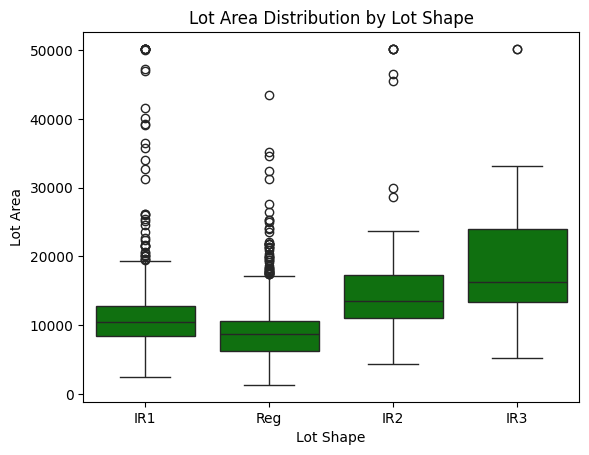

In [ ]:
sns.boxplot(x='Lot Shape', y='Lot Area', data=df_combined, color='green')
plt.title('Lot Area Distribution by Lot Shape')
plt.show()

As suspected, from the box plot it is seen that the IQR for the Regular shaped plots with respect to the Lot area is lower in comparison to the irregular shaped properties. Due to larger lot area being possible with irregularity of the property, the sale price is highest for moderately irregular and irregular properties compared to regularly shaped properties.

 **4.Could type of utilities provided impact the cost of the property sold?**

This is visually compared with barplot to know if price varies with the different types of utilities provided

       AllPub        All public Utilities (E,G,W,& S)        
       NoSewr        Electricity, Gas, and Water (Septic Tank)
       NoSeWa        Electricity and Gas Only
       ELO        Electricity only     


In [ ]:
avg_price_by_utilities = df_combined.groupby('Utilities')['SalePrice'].mean().sort_values(ascending=False)

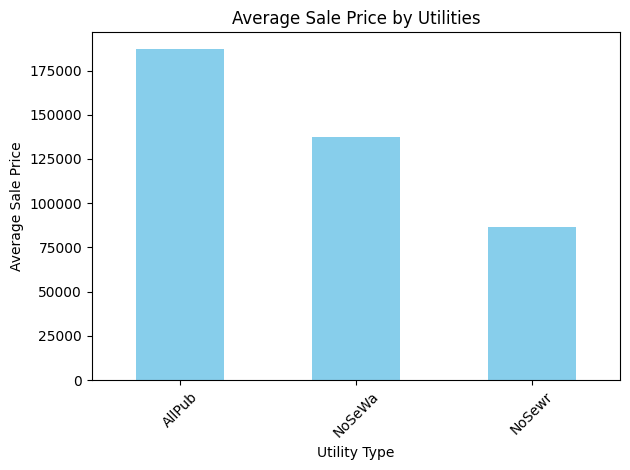

In [ ]:

avg_price_by_utilities.plot(kind='bar', color='skyblue')
plt.title('Average Sale Price by Utilities')
plt.ylabel('Average Sale Price')
plt.xlabel('Utility Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It is clear that properties with all public utilities tends to be sold at a substatially higher price in comparison to only electricity and gas being provided. Thus investing and ensuring that a property has all the public utilities present could increase the rate of the property and so investing in this is a valid investment.

**5.Does miscellaneous feature like elevators/tennis court tends to add value to the property?**

       Elev        Elevator
       Gar2        2nd Garage (if not described in garage section)
       Othr        Other
       Shed        Shed (over 100 SF)
       TenC        Tennis Court
       ND        None


In [ ]:
df_combined['Misc Feature'].value_counts()

,count
Misc Feature,
None,2409
Shed,71
Gar2,3
Othr,2
Elev,1
TenC,1


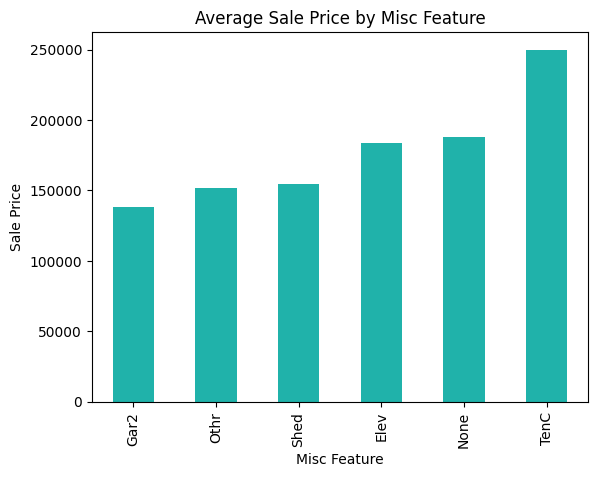

In [ ]:
df_combined.groupby('Misc Feature')['SalePrice'].mean().sort_values().plot(kind='bar', color='lightseagreen')
plt.title('Average Sale Price by Misc Feature')
plt.ylabel('Sale Price')
plt.show()

In [ ]:
misc_feature_cost = df_combined[df_combined['Misc Feature'] != 'None'].groupby('Misc Feature')['Misc Val'].mean().sort_values(ascending=False)

print(misc_feature_cost)


Misc Feature
Elev    7376.600000
Gar2    4958.866667
Othr    3250.000000
TenC    2000.000000
Shed     764.309859
Name: Misc Val, dtype: float64


Although tennis cour is present in only 1 property, it is seen that, the property with tennis court is sold at highest price in comparison to properties without any miscelaneous features. Even properties without any misc features are sold at a higher price in comparison with properties with expensive features like 2nd garage or other features. To conclude amongst the misc features, it is advisable to spend more on building tennis court over Elevator or 2nd garage this feature seems to sell out properties at a higher cost although the price of this misc value is less than most of the other features.

 **6.Impact of exterior features in sale price**
How does investing in exterior features like fencing and porches impact the price of the house?6.1. Does quality of fencing affect the price of the property?

To understand the ROI on external features especially fencing, lets anlayse the correlation between the external features and the sale price. following that with the help of box plot lets study explicitly how fencing could contribute to the sale price

In [ ]:
df_combined[['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'SalePrice']].corr()

,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,SalePrice
Wood Deck SF,1.000000,0.039480,-0.134806,0.013282,-0.057968,0.332214
Open Porch SF,0.039480,1.000000,-0.092126,-0.000403,0.066262,0.309700
Enclosed Porch,-0.134806,-0.092126,1.000000,-0.032929,-0.066629,-0.162656
3Ssn Porch,0.013282,-0.000403,-0.032929,1.000000,-0.028030,0.042677
Screen Porch,-0.057968,0.066262,-0.066629,-0.028030,1.000000,0.128045
SalePrice,0.332214,0.309700,-0.162656,0.042677,0.128045,1.000000


Wood decks and open porches are valuable investments for increasing property prices  with a positive correlation around 0.3. Screen porches have some influence but are not major value drivers. Enclosed and 3-season porches may not contribute positively and could even slightly reduce perceived value depending on how they are built.

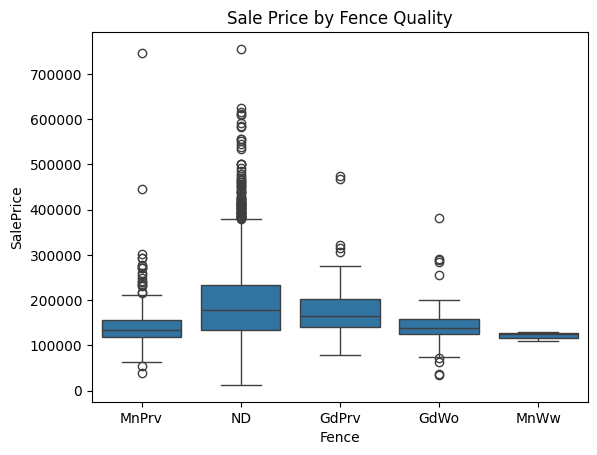

In [ ]:

sns.boxplot(x='Fence', y='SalePrice', data=df_combined)
plt.title('Sale Price by Fence Quality')
plt.show()

From the Box plot it is obseerved that properties with no fence (ND) show the widest spread in sale prices — from low to very high — indicating that the absence of a fence doesn’t significantly impact value if the home has other strong attributes. GdPrv (Good Privacy) fences are associated with higher median sale prices, suggesting a positive influence on property value.

While fencing can add value, especially with high-quality privacy fences, its impact is context-dependent. Poor-quality fencing may even correlate with lower property prices.

 **7.Is there any significant difference in price between a property with a finished garage vs an unfinished garage?**
       
       Fin        Finished
       RFn        Rough Finished        
       Unf        Unfinished
       ND        No Garage
       
To analyze whether finished garages impact sale price, lets  compare SalePrice across garage finish types using a box plot.

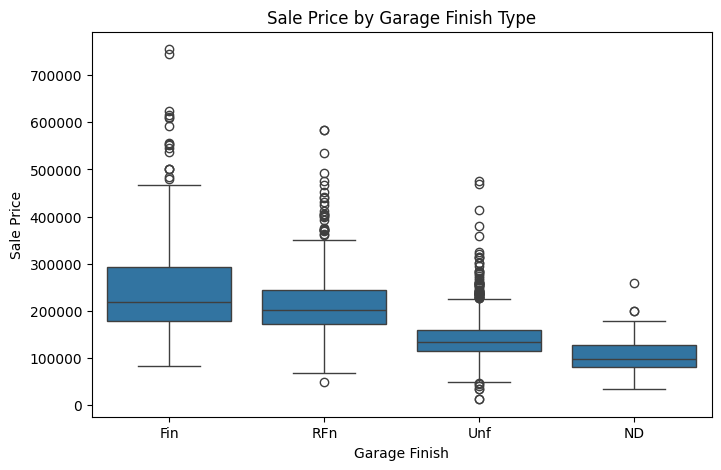

In [ ]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='Garage Finish', y='SalePrice', data=df_combined)
plt.title('Sale Price by Garage Finish Type')
plt.xlabel('Garage Finish')
plt.ylabel('Sale Price')
plt.show()

Clearly, the median value of the sale price is highest for the finished garage in comparison to the properties without garage. Thus, investing in the interior finishing of the garage tends to attract higher purchase capacity buyers.

 **8.Compared to houses not remodelled does remodelled houses are sold at a higher price?**

So for this lets create a new column containing the remodelled date. so the logic used is The column Year Remod/Add reflects Remodel date, and if a house was never remodeled, it will be equal to Year Built. Following that, compare the remodel date with the sale price to see if there is variation of the sale price for remodelled properties.

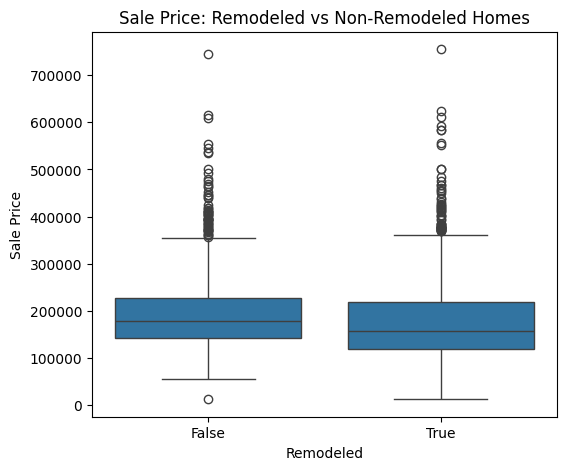

In [ ]:
df_combined['IsRemodeled'] = df_combined['Year Built'] != df_combined['Year Remod/Add']

plt.figure(figsize=(6, 5))
sns.boxplot(x='IsRemodeled', y='SalePrice', data=df_combined)
plt.title('Sale Price: Remodeled vs Non-Remodeled Homes')
plt.xlabel('Remodeled')
plt.ylabel('Sale Price')
plt.show()

This boxplot compares the sale prices of remodeled (True) vs non-remodeled (False) homes. On average, remodeled homes in this dataset are not commanding a higher price than non-remodeled ones. Other features (like size, location, quality) might have a stronger effect on price than remodeling alone.

**9. Which type of heating tends to be sold at a higher price?**

       Floor        Floor Furnace
       GasA        Gas forced warm air furnace
       GasW        Gas hot water or steam heat
       Grav        Gravity furnace        
       OthW        Hot water or steam heat other than gas
       Wall        Wall furnace

Lets compare the different heating types used with the sale price for the property with the different heating types.

In [ ]:
df_combined['Heating'].value_counts()

,count
Heating,
GasA,2448
GasW,25
Grav,9
Wall,2
OthW,2
Floor,1


Since the heating type GasA and GasW are only of a reliable amount and the other heating types are very few in number, they would be grouped together and then if plotted we can gather better insights that is more reliable.

In [ ]:
df_combined['Heating_Simplified'] = df_combined['Heating'].apply(
    lambda x: x if df_combined['Heating'].value_counts()[x] > 20 else 'Other'
)

<Axes: xlabel='Heating_Simplified', ylabel='SalePrice'>

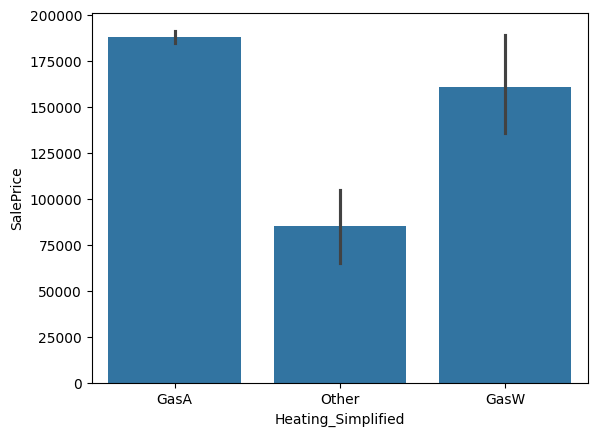

In [ ]:
sns.barplot(x='Heating_Simplified', y='SalePrice', data=df_combined)

Investing in GasA or GasW heating seems to positively impact the value of a home. Less common or outdated systems may lead to lower resale values since the GasA has the highest average sale price and small error bar. there by indicating the values are closer to the mean and reliable. For the remaining heating types, the error bars are longer indicating data is skewed and also lower average sale price.

**10.Are finished basements sold at a higher price? Is quality/area worth the effort?**

       GLQ        Good Living Quarters
       ALQ        Average Living Quarters
       BLQ        Below Average Living Quarters        
       Rec        Average Rec Room
       LwQ        Low Quality
       Unf        Unfinshed
       ND        No Basement

Since the main concern is to know if finished basements adds value, lets combine the basement square feets together and then map it with the quality of its finish. Following that, analyse the weight of the basement area (the square feet and the overall quality of the finished basements) with the sale price.



<Axes: xlabel='BsmtFin Type 1', ylabel='SalePrice'>

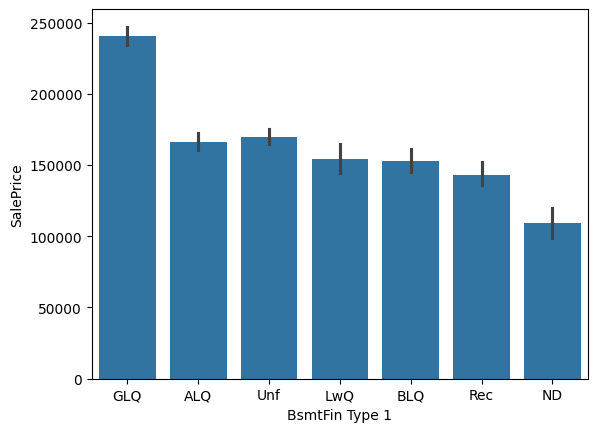

In [ ]:
#combining the total basement areas
df_combined['Total_Finished_Basement_SF'] = df_combined['BsmtFin SF 1'] + df_combined['BsmtFin SF 2']

#Creating a map of the basement qualities
finish_quality = {
    'GLQ': 6,
    'ALQ': 5,
    'BLQ': 4,
    'Rec': 3,
    'LwQ': 2,
    'Unf': 1,
    'ND': 0
}
#Applying the scores of the basements
df_combined['BsmtFinType1_Score'] = df_combined['BsmtFin Type 1'].map(finish_quality)
df_combined['BsmtFinType2_Score'] = df_combined['BsmtFin Type 2'].map(finish_quality)

#weigh the basement areas
df_combined['Weighted_Bsmt_Quality'] = (
    df_combined['BsmtFinType1_Score'] * df_combined['BsmtFin SF 1'] +
    df_combined['BsmtFinType2_Score'] * df_combined['BsmtFin SF 2']
)

#Compare the different finished basements with repect to square feet and their finished state with sale price
sns.barplot(x='BsmtFin Type 1', y='SalePrice', data=df_combined)


In general, Good living quarters with proper basement is observed to play key role in determining the price of the property in comparison to properties without basements. Also, average to even unfinished basements or low quality basements tend to sell better that properties without any basements.

 **11. How does foundation material impact cost?**

       BrkTil        Brick & Tile
       CBlock        Cinder Block
       PConc        Poured Contrete        
       Slab        Slab
       Stone        Stone
       Wood        Wood


<Axes: xlabel='Foundation', ylabel='SalePrice'>

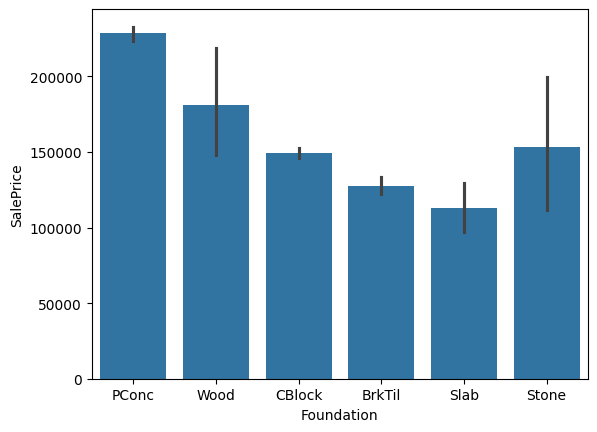

In [ ]:
#compare the foundation material used with sale price
sns.barplot(x='Foundation', y='SalePrice', data=df_combined)

It is observed that, PConc (Poured Concrete) foundations have the highest average sale price, and the smallest error bar, suggesting consistent high value. Wood and Stone also show relatively high prices, but with larger error bars indicates more variation in sale price. On the other hand, BrkTil (Brick & Tile) and Slab foundations have the lowest average prices, implying they’re less desirable. CBlock (Concrete Block) falls in the middle indicating they are less valuable than PConc, but more important than Slab or BrkTil.

The reason possible could be that buyers prefer PConc foundations—possibly for durability or modern construction. Wood or Stone might be associated with older or more unique homes, hence the higher variance. Slab and Brick & Tile might indicate basic or older homes with less overall value.

 **12. Is there a specific neighborhood where houses sell for more?**

<ipython-input-133-52795928ad77>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


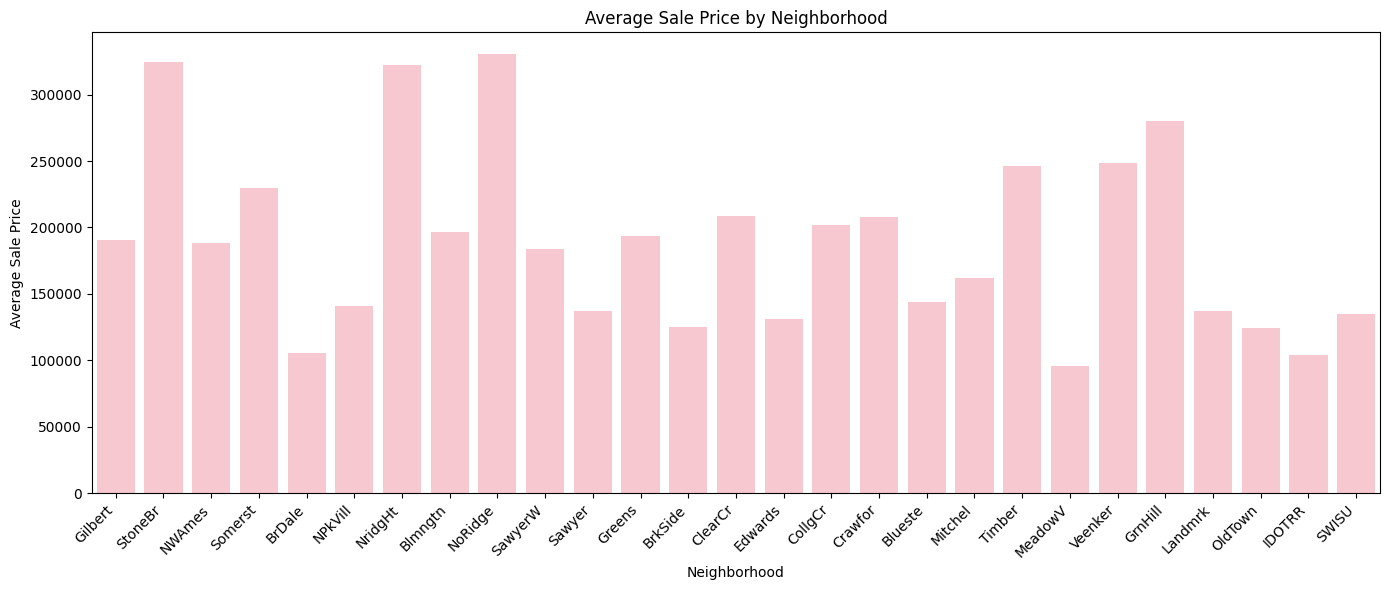

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_combined,
    x='Neighborhood',
    y='SalePrice',
    estimator=np.mean,
    ci=None,
    color='pink'
)
plt.xticks(rotation=45, ha='right')
plt.title('Average Sale Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.tight_layout()
plt.show()

<ipython-input-124-536e420a4553>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


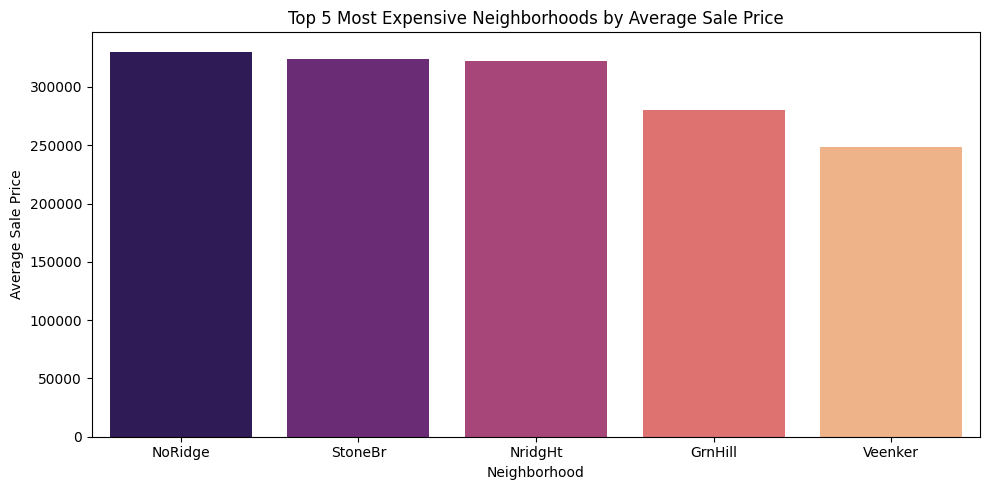

In [ ]:
# Step 1: Calculate average sale price by neighborhood
top5_neighborhoods = (
    df_combined.groupby('Neighborhood')['SalePrice']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

# Step 2: Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top5_neighborhoods,
    x='Neighborhood',
    y='SalePrice',
    color='magenta'
)
plt.title('Top 5 Most Expensive Neighborhoods by Average Sale Price')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.tight_layout()
plt.show()

It is observed that the neighbourhood and the sale price are not linearly related but with some localities having high sale price of the property and some neighborhoods have very low sale price.

Lets see what could be the supporting factors for this price to be high in these neighborhoods.


In [ ]:
df_combined.columns


Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [ ]:
# to check if the price of the property varies with overall quality, the total square feet of the property, year built and even the basement

important_cols = ["SalePrice", "Gr Liv Area", "Overall Qual", "Garage Area", "Total Bsmt SF", "Year Built", 'IsRemodeled']
df_combined.groupby("Neighborhood")[important_cols].mean().sort_values("SalePrice", ascending=False)

#checking for the highest average of sale price for the top 5 neighbourhoods.
top5_neighs = df_combined.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False).head(5).index
df_top5 = df_combined[df_combined["Neighborhood"].isin(top5_neighs)]

df_top5.groupby("Neighborhood")[["SalePrice", "Gr Liv Area", "Overall Qual", "Garage Area", "Year Built", "IsRemodeled"]].mean().sort_values("SalePrice", ascending=False)

,SalePrice,Gr Liv Area,Overall Qual,Garage Area,Year Built,IsRemodeled
Neighborhood,,,,,,
NoRidge,330319.126761,2480.633803,7.929577,721.183099,1995.422535,0.492958
StoneBr,324229.196078,1949.215686,8.372549,625.705882,1999.431373,0.274510
NridgHt,322018.265060,1942.638554,8.277108,747.704819,2005.578313,0.451807
GrnHill,280000.000000,1398.500000,7.000000,299.000000,1992.000000,0.000000
Veenker,248314.583333,1819.541667,7.208333,574.083333,1981.708333,0.333333


In [ ]:
#checking for the highest average of sale price for the top 5 neighbourhoods.
low5_neighs = df_combined.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False).tail(5).index
df_low5 = df_combined[df_combined["Neighborhood"].isin(low5_neighs)]

df_low5.groupby("Neighborhood")[["SalePrice", "Gr Liv Area", "Overall Qual", "Garage Area", "Year Built", "IsRemodeled"]].mean().sort_values("SalePrice", ascending=False)



,SalePrice,Gr Liv Area,Overall Qual,Garage Area,Year Built,IsRemodeled
Neighborhood,,,,,,
BrkSide,124756.250000,1234.907407,5.120370,313.981481,1932.361111,0.972222
OldTown,123991.891213,1431.974895,5.205021,368.535565,1922.343096,0.916318
BrDale,105608.333333,1115.233333,5.733333,292.000000,1971.833333,0.033333
IDOTRR,103752.903226,1205.247312,4.731183,294.440860,1927.677419,0.881720
MeadowV,95756.486486,1066.702703,4.378378,226.378378,1972.243243,0.108108


So from the above table it is insightful to know how the pricey neighbourhoods have properties of not just larger land area but also good quality of the house, they are newer homes in comparison to the neighbourhoods with sale price being the least 5. In these neighbourhoods, even if the properties are remodelled to a greater extent, when the overall quality of the property is low with older properties the price tends to depreciate deeply. So the properties cost is affected by the overall quality, size of the property, garage size and year built. although remodelling can increase the average sale price in low priced neighbourhoods (BrkSide), they can not be matched with the price of the property in high pricey neighbourhood like NoRidge. Thus sale price does vary with neighborhood

**13. Which month sees more high-price sales?**

<Axes: xlabel='Mo Sold', ylabel='SalePrice'>

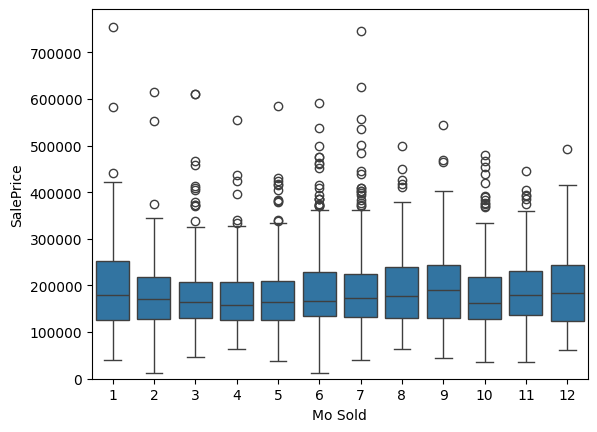

In [ ]:
sns.boxplot(x='Mo Sold', y='SalePrice', data=df_combined)
sns.countplot(x='Mo Sold', data=df_combined)

Summer months (June–August) tend to have higher prices, likely due to:Family relocations during school holidays.Probably due to Better weather they were able to view more properties and finalise on the properties.
December shows good prices possibly due to year-end closing urgency.
Spring and early winter months reflect lower activity/pricing.
in conclusion, Homes sold in summer (especially July) tend to fetch higher prices, while those sold in early spring or late winter are priced lower on average.



### **14.Are all large houses with high square feet tend to be sold at a higher price than smaller sized houses?**

For this we Compare Gr Liv Area (above ground living area) with SalePrice to know if in general when the size of the house increases if there is link with the price of the house.

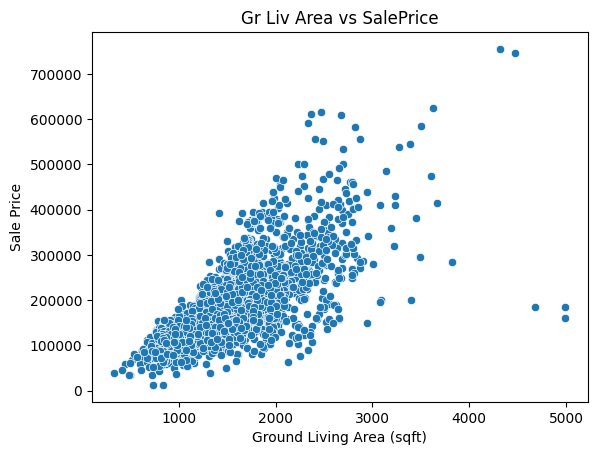

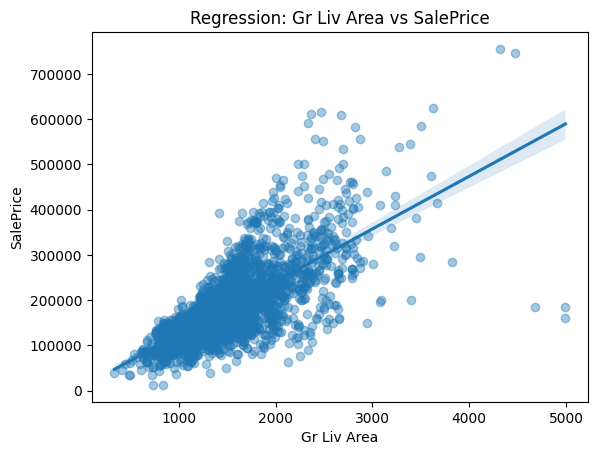

In [ ]:
sns.scatterplot(data=df_combined, x='Gr Liv Area', y='SalePrice')
plt.title('Gr Liv Area vs SalePrice')
plt.xlabel('Ground Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()
#To check if there's a consistent pattern as in if the trend line is upward or downward and wider or narrower
sns.regplot(data=df_combined, x='Gr Liv Area', y='SalePrice', scatter_kws={'alpha':0.4})
plt.title('Regression: Gr Liv Area vs SalePrice')
plt.show()

While there is a strong positive linear relationship between above-ground living area and sale price, not all large homes are priced higher due to the wider trend line. Outliers suggest that other factors like location, finish, or condition may be more influential in some cases. Hence, size is important but not the sole determinant of sale price.

### **Conclusion**

1. Material Quality (especially overall quality, exterior materials) has the strongest impact on sale price.

2. Living Area (Gr Liv Area) and number of rooms are positively correlated with sale price.

3. Lot Area and Lot Frontage show weak linear correlation, but high-end properties tend to have large lots.

4. Zoning and Lot Shape affect pricing: Floating Village (FV) and Irregular lots (IR) are priced higher.

5. Basement Finishing (GLQ, ALQ) contributes positively to property value.

6. Garage Area, Fireplace Quality, and Porch Types influence the price to a moderate degree.

7. Neighborhood plays a significant role: NoRidge, StoneBr, and NridgHt consistently have higher prices.

8. Properties remodeled tend to have similar medians but slightly better spread and upper range values.

9. Foundation material and heating type impact prices, with PConc and GasA performing better.

10. Sale Month matters: June–August sees higher prices, likely due to market seasonality.


### **Recomendations:**

1. Sellers should focus on upgrading material quality, especially kitchen and exterior features, to raise home value.

2. Remodeling old homes, especially in low-priced neighborhoods, could help increase resale value.

3. Finishing the basement (Type 1 and Type 2) adds significant value—investing in GLQ/ALQ styles is beneficial.

4. Properties in top-performing neighborhoods should maintain their quality, while low-priced areas can improve via livable space, remodels, and garage enhancements.

5. For buyers looking for affordable yet appreciating properties, consider under-valued neighborhoods like BrDale or IDOTRR with potential for improvement.

6. Time your sale during peak months (June to August) for higher sale prices.

7. Invest in fireplaces, porches, tennis courts and garages if targeting higher-value segments.
